<a href="https://colab.research.google.com/github/Carolkinyua-hub/Stroke-Prediction/blob/main/Delta_Group_1_Capstone_Project_Final_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction:**


---
Cardiovascular diseases(CVDs) contribute to most of these NCDs deaths at 17.9 million deaths,this not only risks attainment of the 2030 Sustainable Development agenda of reduced death but also crippling of poverty reduction projects in low income countries.


The current dilapidating state of health care and high cost of CVDs management thereby creates grounds for the creation and implementation of a proactive preemptive machine learning solution aligned to WHO recommendations on preventive care and control as a major way to deal with CVDs and promote future social-economic development.

Premised on the availability of anonymised patient data and availability of machine learning it is prudent to identify parameters to aid in identifying the possibility of developing (CVDs).


**Hypothesis to be tested:**

- **H0 (Null Hypothesis):** Hypertension, diabetes, hyperlipidemia, and heart attack are not significantly associated with an increased likelihood of stroke.
- **H1 (Alternative Hypothesis):** Hypertension, diabetes, hyperlipidemia, and heart attack are significantly associated with an increased likelihood of stroke.

---
#**OBJECTIVE:**
The goal of this project is to predict the likelihood of a patient experiencing a stroke based on various input parameters. This project aims to develop your
skills in classification tasks, data preprocessing, and predictive modeling.

#**PROJECT OVERVIEW:**
In this project, you will analyze a dataset containing various attributes of
patients. Your main tasks are to:

#**Feature Impact Analysis:**
Identify and analyze the variables that most significantly impact the likelihood of stroke occurrence.

---
# **Research Questions:**
1. Which key risk factors that have been considered when predicting risk of developing cardiovascular disease?

2. Which  binary classification machine learning models have been used in predicting risk of developing cardiovascular disease and how have they performed?

3. What methodology will be used to develop and test a machine learning model for predicting of risk of developing cardiovascular disease?

4. How will model performance be conducted?

---
# **Assumptions and Scope:**
#**Predict Stroke Occurrence:**

This study aims to develop a machine learning driven Build a predictive model to estimate the likelihood of a patient experiencing a stroke based on their attributes.

#**Feature Impact Analysis:**

Identify and analyze the variables that most significantly impact the likelihood of stroke occurrence.

---

## **Dataset Variables and Measures**
#**DATASET DESCRIPTION:**
The Heart Stroke Prediction dataset includes the following features:

1. **HeartDiseaseorAttack**:
   - **Type**: Binary
   - **Description**: Indicator of heart disease or attack.

2. **HighBP**:
   - **Type**: Binary
   - **Description**: Indicator of high blood pressure.

3. **HighChol**:
   - **Type**: Binary
   - **Description**: Indicator of high cholesterol.

4. **CholCheck**:
   - **Type**: Binary
   - **Description**: Indicator of whether a cholesterol check has been performed.

5. **BMI**:
   - **Type**: Continuous
   - **Description**: Body Mass Index.

6. **Smoker**:
   - **Type**: Binary
   - **Description**: Indicator of smoking status.

7. **Stroke**:
   - **Type**: Binary
   - **Description**: Indicator of stroke history.

8. **Diabetes**:
   - **Type**: Binary
   - **Description**: Indicator of diabetes.

9. **PhysActivity**:
   - **Type**: Binary
   - **Description**: Indicator of physical activity.

10. **Fruits**:
    - **Type**: Binary
    - **Description**: Indicator of fruit consumption.

11. **Veggies**:
    - **Type**: Binary
    - **Description**: Indicator of vegetable consumption.

12. **HvyAlcoholConsump**:
    - **Type**: Binary
    - **Description**: Indicator of heavy alcohol consumption.

13. **AnyHealthcare**:
    - **Type**: Binary
    - **Description**: Indicator of access to healthcare.

14. **NoDocbcCost**:
    - **Type**: Binary
    - **Description**: Indicator of not seeing a doctor due to cost.

15. **GenHlth**:
    - **Type**: Continuous or Ordinal
    - **Description**: General health rating.

16. **MentHlth**:
    - **Type**: Continuous or Ordinal
    - **Description**: Mental health rating.

17. **PhysHlth**:
    - **Type**: Continuous or Ordinal
    - **Description**: Physical health rating.

18. **DiffWalk**:
    - **Type**: Binary
    - **Description**: Indicator of difficulty walking.

19. **Sex**:
    - **Type**: Binary or Categorical
    - **Description**: Gender.

20. **Age**:
    - **Type**: Continuous
    - **Description**: Age.

21. **Education**:
    - **Type**: Ordinal or Categorical
    - **Description**: Level of education.

22. **Income**:
    - **Type**: Ordinal or Continuous
    - **Description**: Income level.

---



## **Import requisite libraries**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.0 MB/s eta 0:00:00


In [ ]:
!pip install imblearn

In [ ]:
!pip install xgboost

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve,auc
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from catboost import CatBoostClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,roc_auc_score, roc_curve

# Importing additional libraries if necessary
import itertools
import scipy.optimize as opt
import pylab as pl


## **Import Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
heart_df=pd.read_csv('/content/drive/My Drive/stroke.csv', low_memory=False)

## **Data Understanding**

In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
heart_df.shape

(253680, 22)

In [ ]:
heart_df.head(2)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0


# Check for misssing values

In [ ]:
heart_df.isna().sum() / len(heart_df) * 100

,0
HeartDiseaseorAttack,0.0
HighBP,0.0
HighChol,0.0
CholCheck,0.0
BMI,0.0
Smoker,0.0
Stroke,0.0
Diabetes,0.0
PhysActivity,0.0
Fruits,0.0


# **Check Duplicate Data**

In [ ]:
heart_df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
# Check for duplicates
duplicates = heart_df.duplicated().sum()

# Percentage of duplicated data
percentage = heart_df.duplicated().sum() / heart_df.shape[0] * 100

print(f'{duplicates} rows contain duplicates amounting to {percentage.round(2)}% of the total data.')

23899 rows contain duplicates amounting to 9.42% of the total data.


In [ ]:
# Inspect some rows containing duplicates as needed
heart_df[heart_df.duplicated()].head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,0.0,1.0,1.0,1.0,27.0,1.0,0.0,2.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


# **Resolve Duplicates**

In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
heart_df = heart_df.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
heart_df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
heart_df.shape

(229781, 22)

# **Duplicate Treatment**
- Pre-duplicate: 253,680 datapoints , 22 collumns
- Post_duplicate: 229,781 datapoimts , 22 collumns

# **Outliers Detection**




In [ ]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,229781.0,0.103216,0.304241,0.0,0.0,0.0,0.0,1.0
HighBP,229781.0,0.454441,0.497921,0.0,0.0,0.0,1.0,1.0
HighChol,229781.0,0.441760,0.496598,0.0,0.0,0.0,1.0,1.0
CholCheck,229781.0,0.959535,0.197047,0.0,1.0,1.0,1.0,1.0
BMI,229781.0,28.685670,6.786360,12.0,24.0,27.0,32.0,98.0
Smoker,229781.0,0.465661,0.498821,0.0,0.0,0.0,1.0,1.0
Stroke,229781.0,0.044756,0.206767,0.0,0.0,0.0,0.0,1.0
Diabetes,229781.0,0.325627,0.724623,0.0,0.0,0.0,0.0,2.0
PhysActivity,229781.0,0.733355,0.442206,0.0,0.0,1.0,1.0,1.0
Fruits,229781.0,0.612966,0.487073,0.0,0.0,1.0,1.0,1.0


In [ ]:
heart_df.Stroke.value_counts()

,count
Stroke,
0.0,219497
1.0,10284


In [ ]:
heart_df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

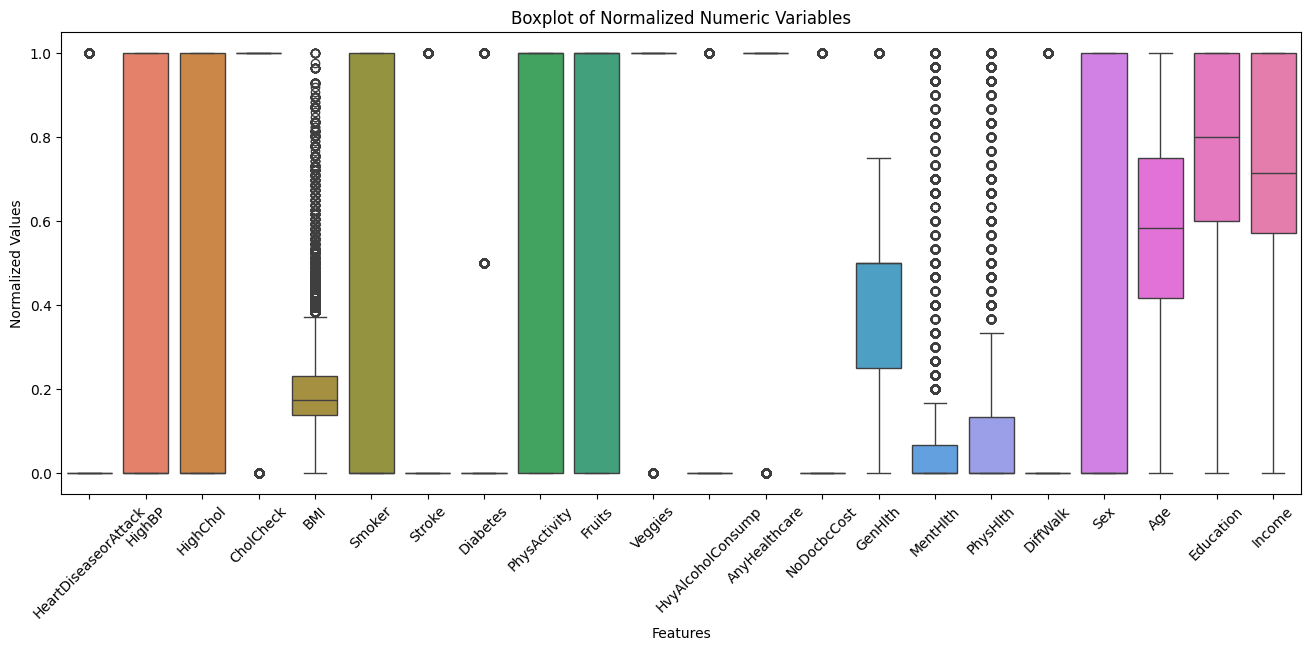

In [ ]:
# Select numeric columns
num_columns = heart_df.select_dtypes(include=['int64', 'float64'])

# Normalize values using Min-Max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(num_columns)

# Create DataFrame with normalized data
df_normalized = pd.DataFrame(normalized_data, columns=num_columns.columns)

# Create boxplot to visualize distribution of all numeric variables
plt.figure(figsize=(16, 6))  # Adjust figure size as needed
sns.boxplot(data=df_normalized)  # Use orient='h' for horizontal boxplot if needed
plt.title('Boxplot of Normalized Numeric Variables')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Normalized Values')

plt.show()

In [ ]:
# Determine the number of rows containing outliers for each variable that needs to be addressed

# Compute the 25th percentile value in `X_n`
percentile25 = heart_df[['PhysHlth','BMI','MentHlth']].quantile(0.25)

# Compute the 75th percentile value in `X_n`
percentile75 = heart_df[['PhysHlth','BMI','MentHlth']].quantile(0.75)

# Compute the interquartile range in `X_n`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `X_n`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `X_n`
outliers = heart_df[(heart_df[['PhysHlth','BMI','MentHlth']] > upper_limit) | (heart_df[['PhysHlth','BMI','MentHlth']]< lower_limit)]

# Count how many rows in the data contain outliers in `heart_df[['PhysHlth','BMI','MentHlth']]`
print("Number of rows in the data containing outliers in dataset:", len(outliers))

Lower limit: PhysHlth    -6.0
BMI         12.0
MentHlth    -3.0
dtype: float64
Upper limit: PhysHlth    10.0
BMI         44.0
MentHlth     5.0
dtype: float64
Number of rows in the data containing outliers in dataset: 229781


# **Outlier Resolution**

In [ ]:
# Determine the number of rows containing outliers for each variable that needs to be addressed

# Compute the 25th percentile value in `X_n`
percentile25 = heart_df[['PhysHlth','BMI','MentHlth']].quantile(0.25)

# Compute the 75th percentile value in `X_n`
percentile75 = heart_df[['PhysHlth','BMI','MentHlth']].quantile(0.75)

# Compute the interquartile range in `X_n`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `X_n`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `X_n`
outliers = heart_df[(heart_df[['PhysHlth','BMI','MentHlth']] > upper_limit) | (heart_df[['PhysHlth','BMI','MentHlth']] < lower_limit)]

# Count how many rows in the data contain outliers in `X_n`
print("Number of rows in the data containing outliers in ` PhysHlth, BMI, MentHlth`:", len(outliers))

Lower limit: PhysHlth    -6.0
BMI         12.0
MentHlth    -3.0
dtype: float64
Upper limit: PhysHlth    10.0
BMI         44.0
MentHlth     5.0
dtype: float64
Number of rows in the data containing outliers in ` PhysHlth, BMI, MentHlth`: 229781


In [ ]:
# floor and ceiling method

# Calculate 10th percentile
tenth_percentile = np.percentile(heart_df[['PhysHlth','BMI','MentHlth']], 10, axis=0)

# Calculate 90th percentile
ninetieth_percentile = np.percentile(heart_df[['PhysHlth','BMI','MentHlth']], 90, axis=0)

# Apply lambda function to replace outliers with thresholds defined above
for i, col in enumerate(['PhysHlth','BMI','MentHlth']): # Use enumerate to get numerical index
    heart_df[col] = heart_df[col].apply(lambda x: (
        tenth_percentile[i] if x < tenth_percentile[i]  # Use numerical index i
        else ninetieth_percentile[i] if x > ninetieth_percentile[i] # Use numerical index i
        else x))

In [ ]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,229781.0,0.103216,0.304241,0.0,0.0,0.0,0.0,1.0
HighBP,229781.0,0.454441,0.497921,0.0,0.0,0.0,1.0,1.0
HighChol,229781.0,0.441760,0.496598,0.0,0.0,0.0,1.0,1.0
CholCheck,229781.0,0.959535,0.197047,0.0,1.0,1.0,1.0,1.0
BMI,229781.0,28.286020,4.791812,22.0,24.0,27.0,32.0,37.0
Smoker,229781.0,0.465661,0.498821,0.0,0.0,0.0,1.0,1.0
Stroke,229781.0,0.044756,0.206767,0.0,0.0,0.0,0.0,1.0
Diabetes,229781.0,0.325627,0.724623,0.0,0.0,0.0,0.0,2.0
PhysActivity,229781.0,0.733355,0.442206,0.0,0.0,1.0,1.0,1.0
Fruits,229781.0,0.612966,0.487073,0.0,0.0,1.0,1.0,1.0


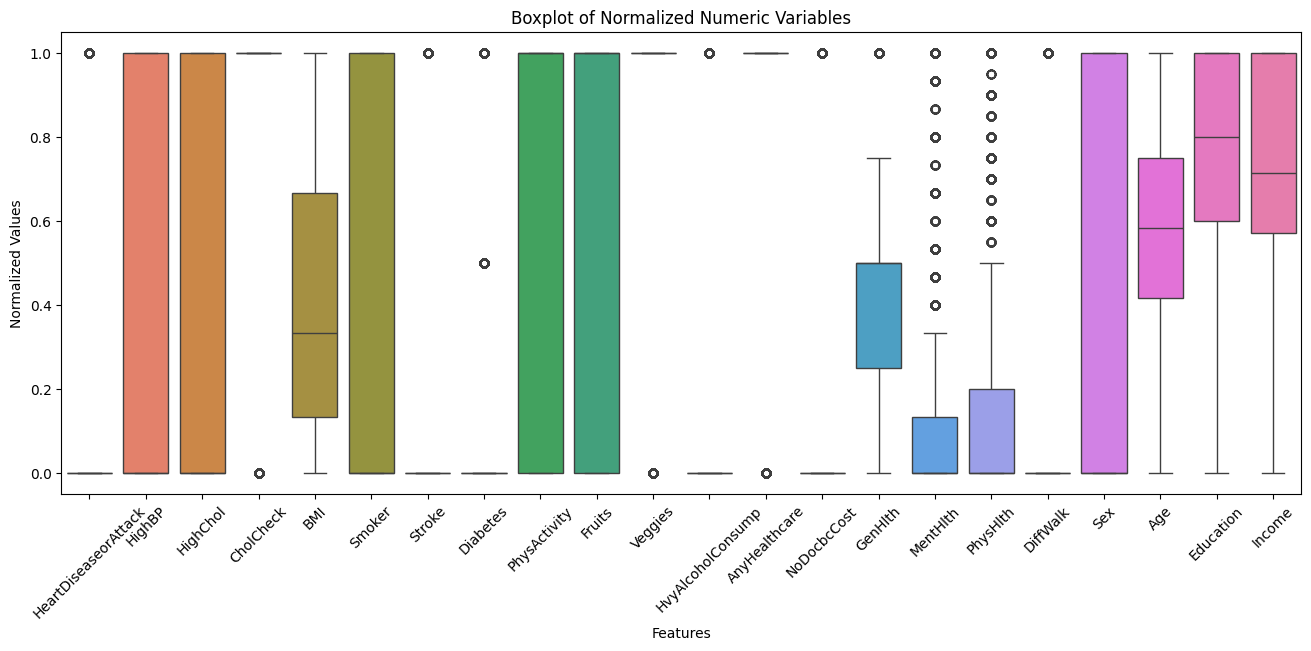

In [ ]:
# Select numeric columns
num_columns = heart_df.select_dtypes(include=['int64', 'float64'])

# Normalize values using Min-Max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(num_columns)

# Create DataFrame with normalized data
df_normalized = pd.DataFrame(normalized_data, columns=num_columns.columns)

# Create boxplot to visualize distribution of all numeric variables
plt.figure(figsize=(16, 6))  # Adjust figure size as needed
sns.boxplot(data=df_normalized)  # Use orient='h' for horizontal boxplot if needed
plt.title('Boxplot of Normalized Numeric Variables')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Normalized Values')

plt.show()

# **Stroke Distribution:**
- 95.52% have not had a stroke.
- 4.48%  have had a stroke.

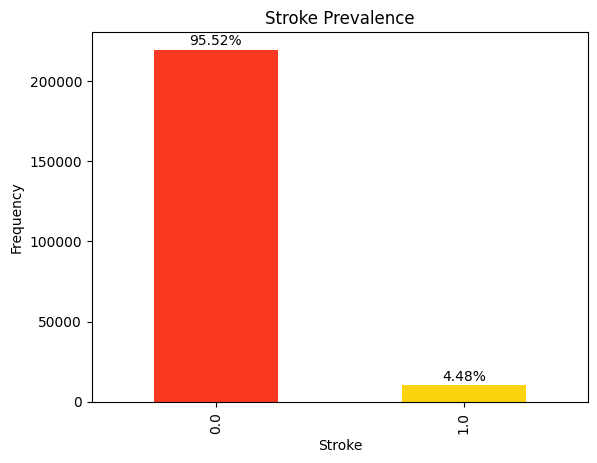

In [ ]:
# Calculate value counts and percentage
stroke_counts = heart_df['Stroke'].value_counts()
stroke_percentages = (stroke_counts / stroke_counts.sum()) * 100

# Plot the bar chart
ax = stroke_counts.plot.bar(title="Stroke Prevalence", color=['#F93822', '#FDD20E'])
plt.ylabel('Frequency')
plt.xlabel('Stroke')

# Annotate the bars with percentages
for i, percentage in enumerate(stroke_percentages):
    ax.text(i, stroke_counts[i] + 1000, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

# **The correlation of variables with stroke and visualization of the summary statistics for stroke and non-stroke groups.**

Correlation of Stroke with other variables:
 Stroke                  1.000000
HeartDiseaseorAttack    0.198863
GenHlth                 0.169870
DiffWalk                0.169442
PhysHlth                0.140252
Age                     0.128040
HighBP                  0.124426
Diabetes                0.100276
HighChol                0.089258
MentHlth                0.057100
Smoker                  0.054438
NoDocbcCost             0.028691
CholCheck               0.027894
BMI                     0.013707
AnyHealthcare           0.013565
Sex                     0.003560
Fruits                 -0.004613
HvyAlcoholConsump      -0.021272
Veggies                -0.033141
PhysActivity           -0.059440
Education              -0.064319
Income                 -0.117232
Name: Stroke, dtype: float64


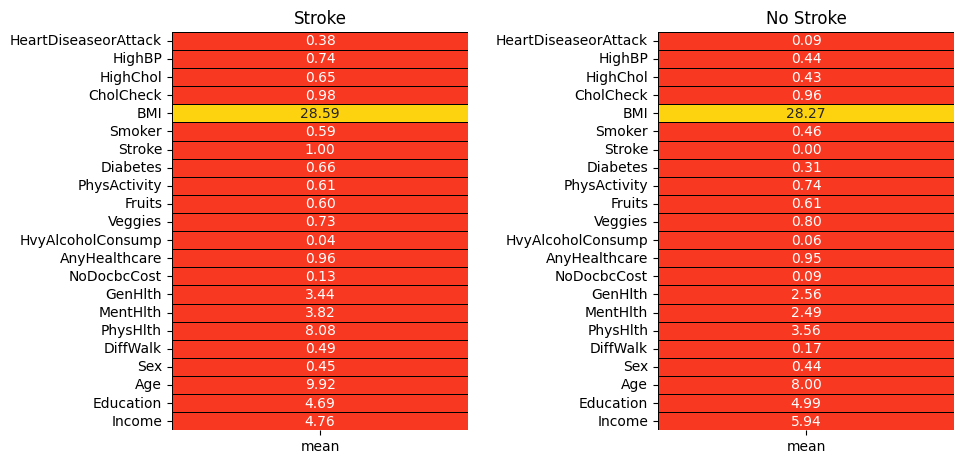

In [ ]:
# Calculate correlations with 'Stroke'
correlations = heart_df.corr()['Stroke'].sort_values(ascending=False)

# Display correlations
print("Correlation of Stroke with other variables:\n", correlations)

# Filter the dataframe and assign to variables 'yes' and 'no'
yes = heart_df[(heart_df['Stroke'] == 1)].describe().T
no = heart_df[(heart_df['Stroke'] == 0)].describe().T

# Colors for heatmap
colors = ['#F93822', '#FDD20E']

# Plot the heatmaps
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(yes[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Stroke')

plt.subplot(1, 2, 2)
sns.heatmap(no[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('No Stroke')

fig.tight_layout(pad=2)
plt.show()


**Key Insights:**

**Positive Correlations:**

- **HeartDiseaseorAttack (0.203):** This variable has the highest positive correlation with stroke, indicating that individuals with a history of heart disease or attack are more likely to have experienced a stroke.

- **GenHlth (0.178):** General health status shows a moderate positive correlation with stroke, suggesting that poorer general health is associated with a higher likelihood of stroke.

- **DiffWalk (0.177):** Difficulty walking is moderately positively correlated with stroke, implying that those who have trouble walking are more prone to having a stroke.

- **PhysHlth (0.149):** Poor physical health also shows a moderate positive correlation with stroke, indicating that those with lower physical health status are at a higher risk.

- **HighBP (0.130):** High blood pressure has a positive correlation with stroke, signifying that individuals with high blood pressure are more likely to have suffered a stroke.

- **Age (0.127):** Age is positively correlated with stroke, with older individuals showing a higher likelihood of having had a stroke.

**Negative Correlations:**

- **Income (-0.129):** This variable shows the most substantial negative correlation with stroke, suggesting that individuals with higher income levels are less likely to have had a stroke.

- **Education (-0.076):** Education level has a negative correlation with stroke, indicating that individuals with higher education are less likely to experience a stroke.

- **PhysActivity (-0.069):** Physical activity exhibits a negative correlation with stroke, suggesting that individuals who engage in physical activity are less likely to have had a stroke.

**Near Zero Correlations:**

- **AnyHealthcare (0.009):** The correlation between healthcare access and stroke is very close to zero, indicating little to no linear relationship in this dataset.

- **Sex (0.003):** The correlation between sex and stroke is almost zero, suggesting minimal to no linear relationship with stroke occurrence in this dataset.





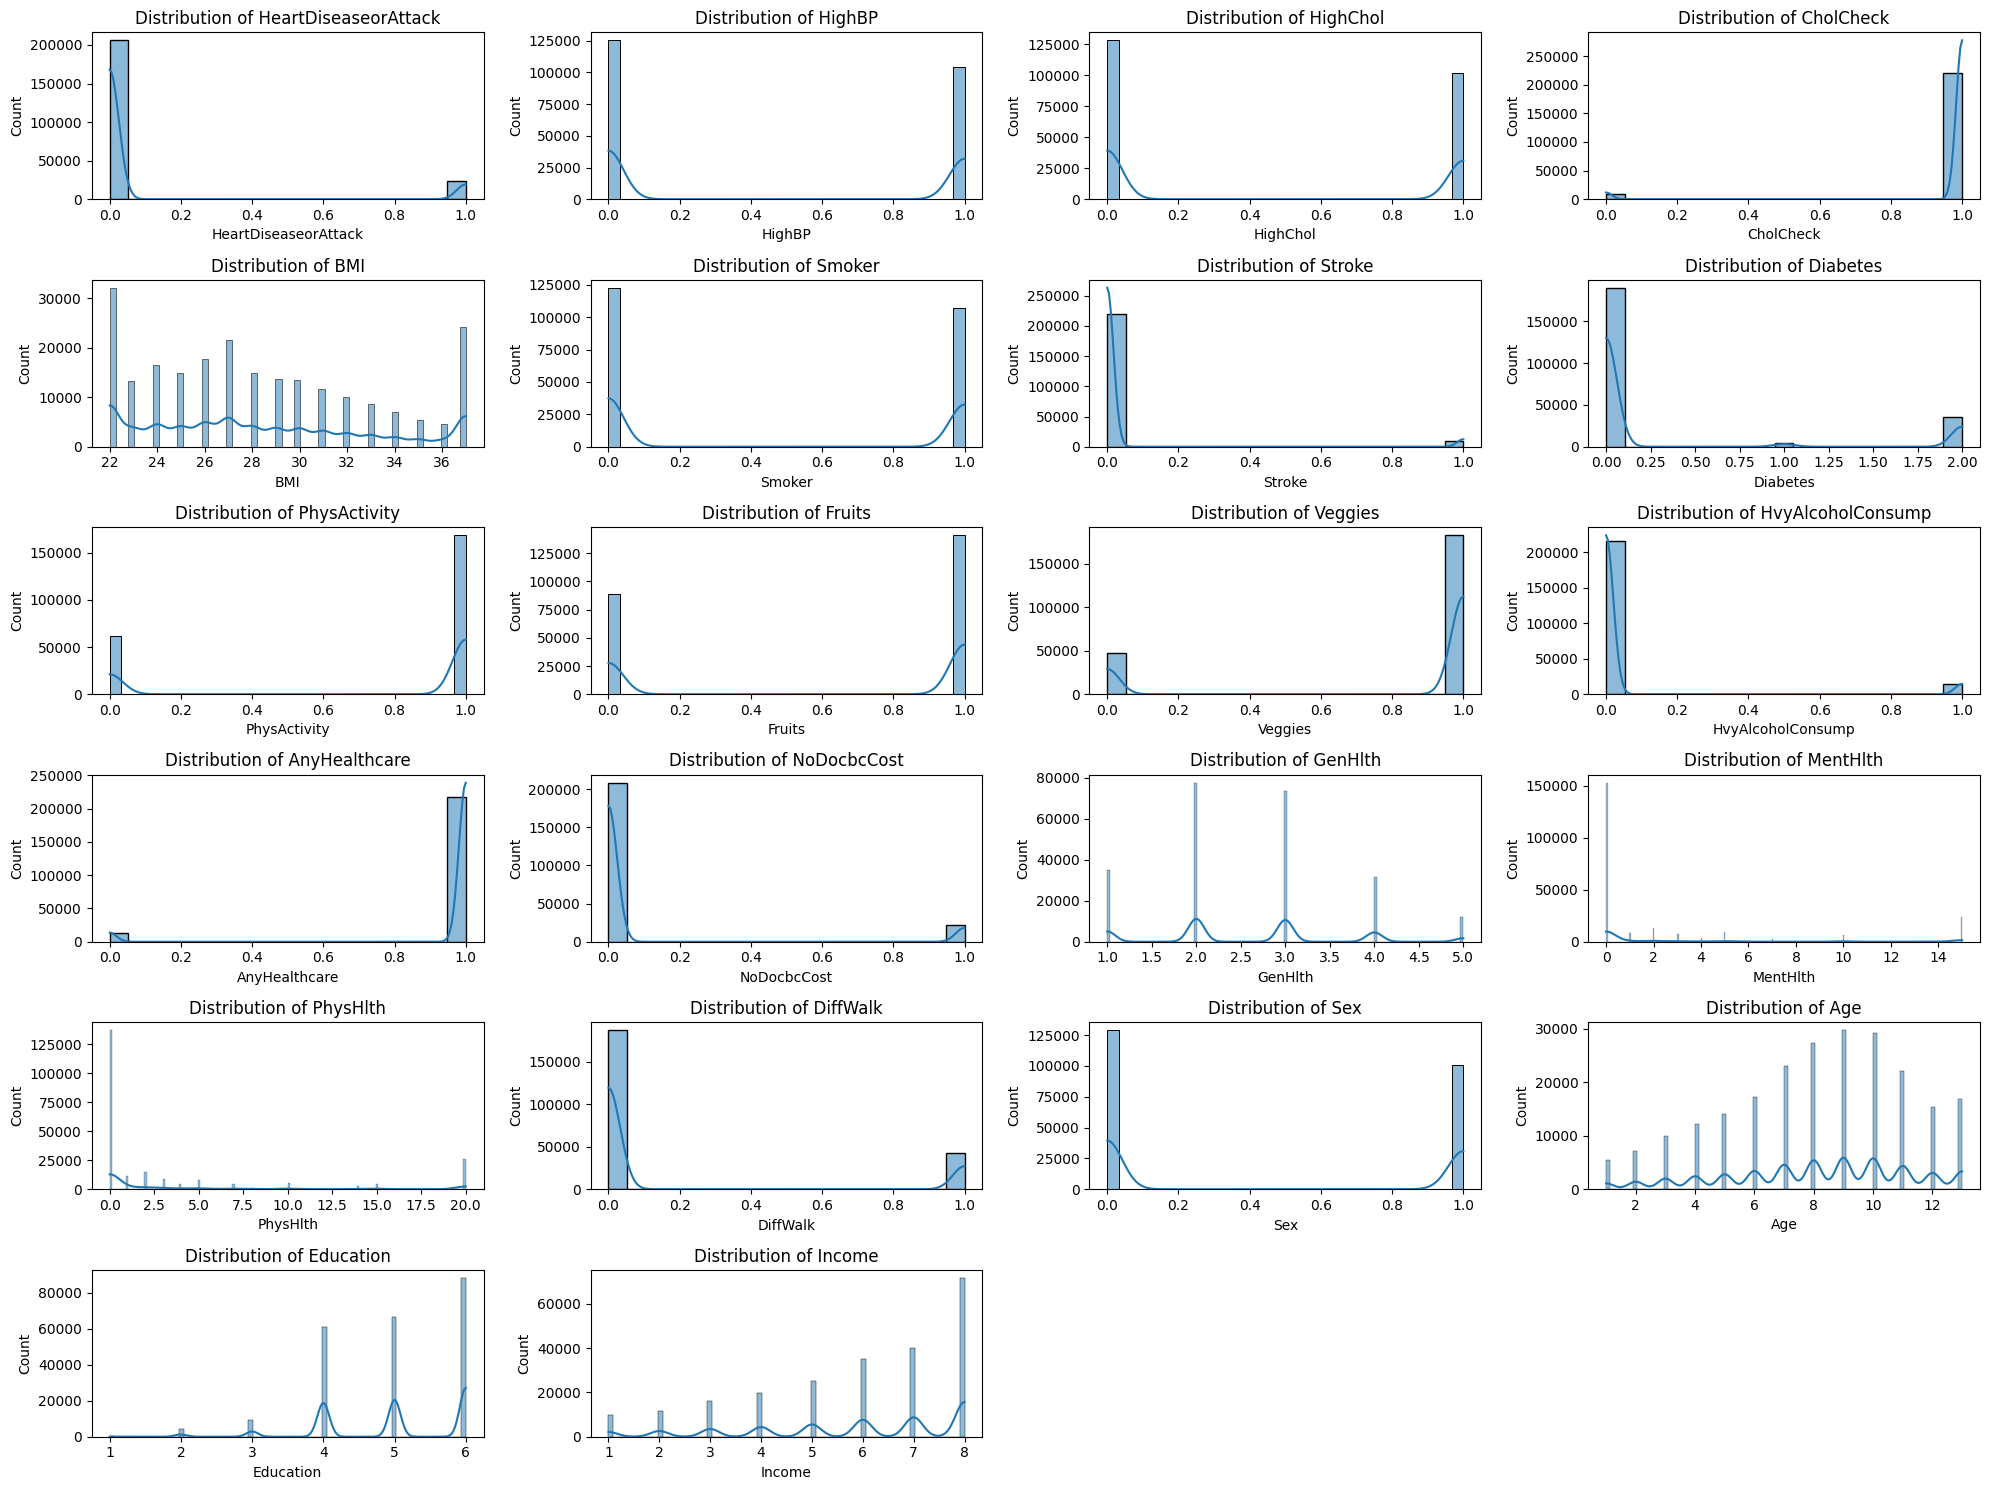

In [ ]:
def distribution_plots(df):
    """
    Creates distribution plots for each feature in the dataset.
    """
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(df.columns):
        plt.subplot(len(df.columns) // 4 + 1, 4, i + 1)
        sns.histplot(df[feature], kde=True)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

# Generate distribution plots for each feature in heart_df
distribution_plots(heart_df)


# **Correlation Matrix**

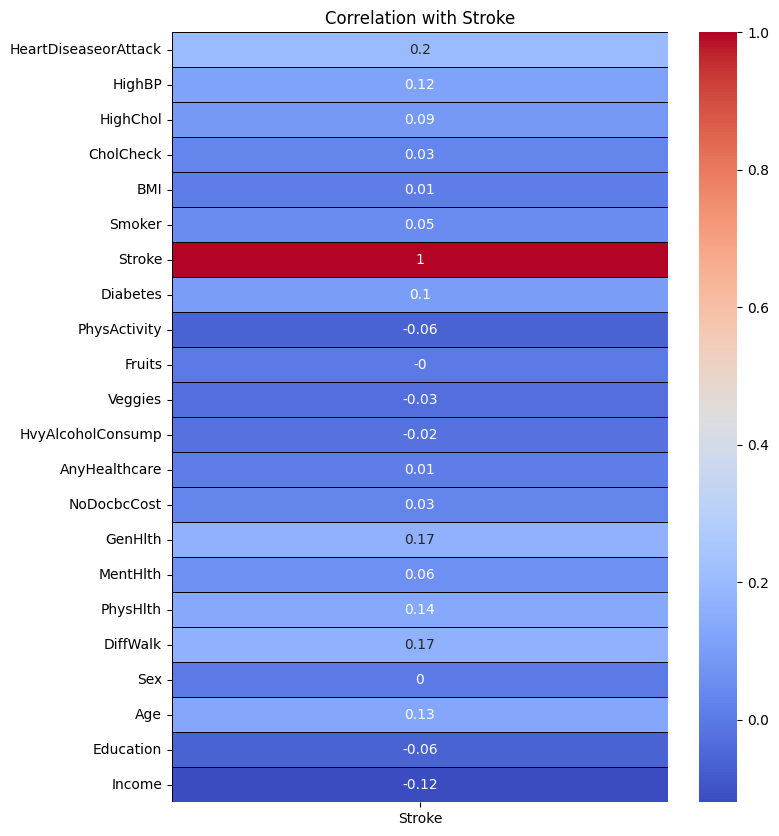

In [ ]:
# Calculate the correlation matrix
corr_matrix = heart_df.corr()

# Extract the correlation with 'Stroke' and round to 2 decimal places
corr_with_stroke = corr_matrix[['Stroke']].round(2)

# Plot the heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(corr_with_stroke, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='black')
plt.title('Correlation with Stroke')
plt.show()

In [ ]:
# Calculate the correlation matrix
corr_matrix = heart_df.corr()

# Extract the correlation with 'Stroke' and round to 2 decimal places
corr_with_stroke = corr_matrix[['Stroke']].round(2)
print(corr_with_stroke)

                      Stroke
HeartDiseaseorAttack    0.20
HighBP                  0.12
HighChol                0.09
CholCheck               0.03
BMI                     0.01
Smoker                  0.05
Stroke                  1.00
Diabetes                0.10
PhysActivity           -0.06
Fruits                 -0.00
Veggies                -0.03
HvyAlcoholConsump      -0.02
AnyHealthcare           0.01
NoDocbcCost             0.03
GenHlth                 0.17
MentHlth                0.06
PhysHlth                0.14
DiffWalk                0.17
Sex                     0.00
Age                     0.13
Education              -0.06
Income                 -0.12


### Interpretation:

- **Strong Positive Correlations:**
  - **HeartDiseaseorAttack (0.20):** Shows a moderate positive relationship with stroke, indicating that those with a history of heart disease or attack are more likely to experience a stroke.
  - **PhysHlth (0.14):** A positive correlation suggesting that worse physical health is associated with a higher risk of stroke.
  - **GenHlth (0.17):** General health is positively correlated with stroke, meaning poorer general health is linked to a higher likelihood of stroke.
  - **DiffWalk (0.17):** Difficulty walking has a moderate positive correlation with stroke, implying that individuals with walking difficulties may be at a higher risk.
  - **Age (0.13):** Age shows a moderate positive correlation with stroke risk, as older age is associated with a higher risk of stroke.

- **Moderate Positive Correlations:**
  - **HighBP (0.12):** High blood pressure has a moderate positive correlation with stroke, indicating that individuals with high blood pressure are more likely to suffer a stroke.
  - **Diabetes (0.10):** Diabetes also shows a moderate positive correlation with stroke risk.
  - **HighChol (0.09):** High cholesterol has a slight positive relationship with stroke.

- **Weak Positive Correlations:**
  - **CholCheck (0.03):** Checking cholesterol levels shows a very weak positive correlation with stroke.
  - **AnyHealthcare (0.01):** Access to healthcare has a minimal positive correlation with stroke risk.
  - **BMI (0.01):** Body mass index shows a negligible positive correlation with stroke.
  
- **Negative Correlations:**
  - **PhysActivity (-0.06):** Physical activity shows a weak negative correlation with stroke, suggesting that higher physical activity might slightly reduce stroke risk.
  - **Fruits (-0.00):** Fruit consumption has an almost negligible negative correlation with stroke.
  - **Veggies (-0.03):** Vegetable consumption shows a very weak negative correlation with stroke.
  - **HvyAlcoholConsump (-0.02):** Heavy alcohol consumption has a minimal negative correlation with stroke.
  - **NoDocbcCost (0.03):** The cost of not seeing a doctor has a very weak positive correlation with stroke risk.
  - **Education (-0.06):** Education level shows a weak negative correlation with stroke, suggesting that higher education might be associated with a slightly lower risk.
  - **Income (-0.12):** Income has a slight negative correlation with stroke, indicating that higher income might be associated with a lower risk.

- **No Significant Correlation:**
  - **Smoker (0.05):** Smoking shows a weak positive correlation with stroke.
  - **Sex (0.00):** Sex shows no correlation with stroke.

### Summary:

- **Higher Risk Factors:** Heart disease, poor physical health, general health status, difficulty walking, age, high blood pressure, diabetes, and high cholesterol are positively correlated with stroke.
- **Lower Risk Factors:** Physical activity, fruit and vegetable consumption, heavy alcohol consumption, and higher income show minimal to weak negative correlations with stroke.

 # **Factor analysis is a statistical method used to identify the underlying relationships between variables by grouping them into factors.**

In [ ]:
# Filter the dataset to include only rows where Stroke == 1
stroke_df = heart_df[heart_df['Stroke'] == 1]

# Drop the 'Stroke' column as it's not needed for factor analysis
stroke_df = stroke_df.drop(columns=['Stroke'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(stroke_df)

# Specify the number of factors you want to extract
num_factors = 5
factor = FactorAnalysis(n_components=num_factors)

# Fit the model and transform the data
factor_fit = factor.fit_transform(scaled_data)

# Get the factor loadings
loadings = factor.components_.T

# Convert factor loadings to a DataFrame for better readability
loadings_df = pd.DataFrame(loadings, index=stroke_df.columns, columns=[f'Factor{i+1}' for i in range(num_factors)])
print(loadings_df)

                       Factor1   Factor2   Factor3   Factor4   Factor5
HeartDiseaseorAttack  0.262459 -0.224593 -0.041960  0.085861  0.120730
HighBP                0.174588 -0.295689  0.041768  0.271177 -0.026065
HighChol              0.167047 -0.198766 -0.008864  0.199502  0.072035
CholCheck            -0.000766 -0.153264 -0.054784  0.066302 -0.059273
BMI                   0.242694  0.082249 -0.004890  0.496965 -0.174321
Smoker                0.132100 -0.031949  0.069864 -0.046677  0.286042
Diabetes              0.276616 -0.184495 -0.034857  0.369688 -0.105137
PhysActivity         -0.318289  0.090750 -0.068787 -0.016824  0.005493
Fruits               -0.146448 -0.071573 -0.180661 -0.131638 -0.224626
Veggies              -0.155746  0.003040 -0.226214 -0.063542 -0.158203
HvyAlcoholConsump    -0.083406  0.085348 -0.018229 -0.029137  0.135216
AnyHealthcare        -0.101547 -0.234834 -0.152335 -0.042365 -0.064968
NoDocbcCost           0.294416  0.279763  0.126462  0.002425  0.020453
GenHlt

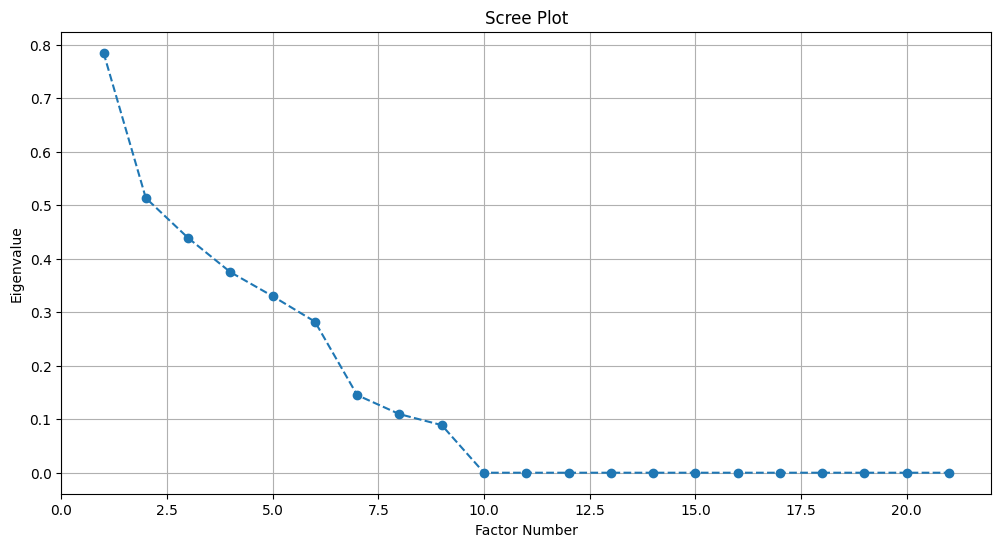

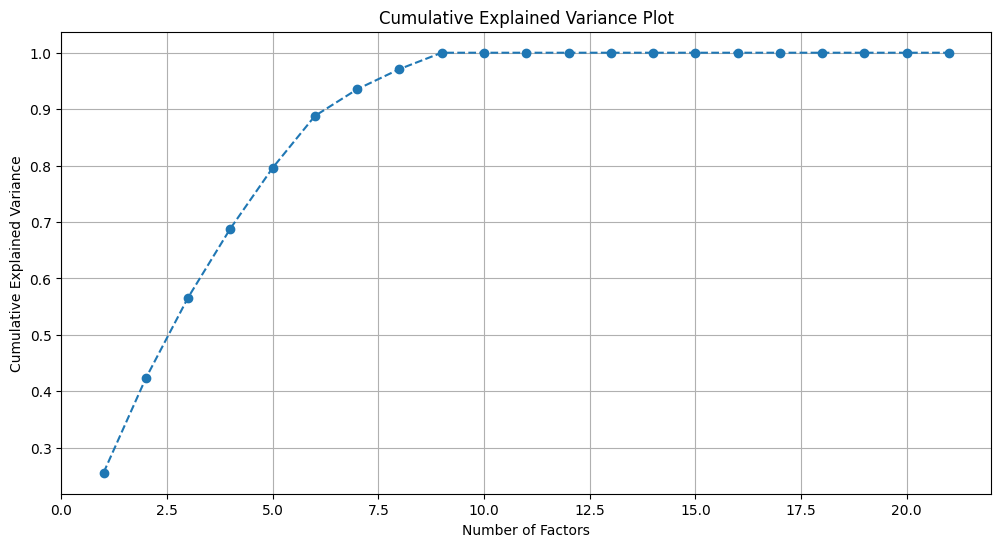

In [ ]:
# Filter the dataset to include only rows where Stroke == 1
stroke_df = heart_df[heart_df['Stroke'] == 1]

# Exclude the 'Stroke' column as it's the target variable
X_stroke = stroke_df.drop(columns=['Stroke'])

# Standardize the data
scaler = StandardScaler()
X_stroke_scaled = scaler.fit_transform(X_stroke)

# Perform Factor Analysis to determine the number of factors
factor = FactorAnalysis(n_components=len(X_stroke.columns), random_state=42)  # Number of components = number of variables
X_stroke_factors = factor.fit_transform(X_stroke_scaled)

# Calculate explained variance
explained_variance = np.var(X_stroke_factors, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

# Scree Plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

# Cumulative Explained Variance Plot
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Plot')
plt.xlabel('Number of Factors')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

### **Factor 1**
- **High Loadings:** HeartDiseaseorAttack (0.262), BMI (0.243), GenHlth (0.756), PhysHlth (0.733), MentHlth (0.493), Diabetes (0.277), NoDocbcCost (0.294), DiffWalk (0.587)
- **Interpretation:** This factor represents a general health status and access to healthcare. High loadings on overall health measures, including general health, physical health, mental health, and conditions like diabetes, indicate it reflects a broad spectrum of health status and healthcare access.

### **Factor 2**
- **High Loadings:** HighBP (-0.296), HighChol (-0.199), AnyHealthcare (-0.235), Age (-0.659), Education (0.118), Income (0.037)
- **Interpretation:** This factor relates to issues surrounding hypertension, high cholesterol, and healthcare access. The negative loadings suggest a focus on managing chronic conditions like hypertension and high cholesterol, as well as access to healthcare.

### **Factor 3**
- **High Loadings:** Education (-0.489), Income (-0.464), Veggies (-0.226), Smoker (0.070)
- **Interpretation:** This factor captures socioeconomic status and its influence on lifestyle choices. The negative loadings on education and income, combined with dietary habits, highlight the impact of socioeconomic factors on lifestyle.

### **Factor 4**
- **High Loadings:** BMI (0.497), Diabetes (0.370), HighChol (0.200)
- **Interpretation:** This factor is associated with metabolic health and obesity-related issues. High loadings on BMI, diabetes, and high cholesterol indicate a focus on metabolic and obesity-related health conditions.

### **Factor 5**
- **High Loadings:** Fruits (0.216), Sex (0.468), Smoker (-0.288), DiffWalk (0.123)
- **Interpretation:** This factor relates to lifestyle and demographic characteristics. The loadings suggest it captures variations in lifestyle choices, such as fruit consumption and smoking, as well as demographic differences.

### Summary of Factors:
- **Factor 1:** General health status and healthcare access.
- **Factor 2:** Management of hypertension, cholesterol, and healthcare access.
- **Factor 3:** Socioeconomic status and lifestyle factors.
- **Factor 4:** Metabolic and obesity-related health issues.
- **Factor 5:** Lifestyle and demographic characteristics.

#**Hypothesis Testing**

In [ ]:
import pandas as pd
from scipy import stats

# Define features and target variable
features = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
            'Smoker', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
            'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
            'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
            'Income']
target = 'Stroke'

# Initialize a list to store significant features
significant_features = []

# Chi-Square Test for independence
for feature in features:
    # Create a contingency table
    contingency_table = pd.crosstab(heart_df[feature], heart_df[target])

    # Perform Chi-Square Test
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)

    # Print results
    print(f"\nChi-Square Test for {feature}:")
    print(f"Chi2 Statistic: {chi2}")
    print(f"P-Value: {p}")

    # Check if p-value is less than 0.05
    if p < 0.05:
        significant_features.append(feature)

# Display significant features
print("\nSignificant Features based on Chi-Square Test:")
print(significant_features)

# Correlation Analysis (for significant features only)
print("\nCorrelation Matrix for Significant Features:")
significant_df = heart_df[significant_features + [target]]
print(significant_df.corr())




Chi-Square Test for HeartDiseaseorAttack:
Chi2 Statistic: 9083.901506048094
P-Value: 0.0

Chi-Square Test for HighBP:
Chi2 Statistic: 3556.24727350051
P-Value: 0.0

Chi-Square Test for HighChol:
Chi2 Statistic: 1829.797282095496
P-Value: 0.0

Chi-Square Test for CholCheck:
Chi2 Statistic: 178.0995763622243
P-Value: 1.2600037030685483e-40

Chi-Square Test for BMI:
Chi2 Statistic: 54.23497362300396
P-Value: 2.399545227578479e-06

Chi-Square Test for Smoker:
Chi2 Statistic: 680.4195476945722
P-Value: 5.4161196859957e-150

Chi-Square Test for Diabetes:
Chi2 Statistic: 2315.701598126201
P-Value: 0.0

Chi-Square Test for PhysActivity:
Chi2 Statistic: 811.2000384317078
P-Value: 1.9814911731384787e-178

Chi-Square Test for Fruits:
Chi2 Statistic: 4.843453557262246
P-Value: 0.027751265027030427

Chi-Square Test for Veggies:
Chi2 Statistic: 251.97020062496966
P-Value: 9.658835814005369e-57

Chi-Square Test for HvyAlcoholConsump:
Chi2 Statistic: 103.54427266745485
P-Value: 2.5463984209243207e-24

### **Hypothesis Testing Summary**

**Hypothesis to be tested:**

- **H0 (Null Hypothesis):** Hypertension, diabetes, hyperlipidemia, and heart attack are not significantly associated with an increased likelihood of stroke.
- **H1 (Alternative Hypothesis):** Hypertension, diabetes, hyperlipidemia, and heart attack are significantly associated with an increased likelihood of stroke.

#### **Chi-Square Test Results**

- **HighBP:**
  - **Chi2 Statistic:** 4257.87
  - **P-Value:** 0.0
  - **Decision:** Reject the null hypothesis for HighBP. There is a significant association between hypertension and stroke.

- **Diabetes:**
  - **Chi2 Statistic:** 2916.75
  - **P-Value:** 0.0
  - **Decision:** Reject the null hypothesis for Diabetes. There is a significant association between diabetes and stroke.

- **HighChol:**
  - **Chi2 Statistic:** 2175.24
  - **P-Value:** 0.0
  - **Decision:** Reject the null hypothesis for HighChol. There is a significant association between hyperlipidemia and stroke.

- **HeartDiseaseorAttack:**
  - **Chi2 Statistic:** 10450.58
  - **P-Value:** 0.0
  - **Decision:** Reject the null hypothesis for HeartDiseaseorAttack. There is a significant association between heart disease or a heart attack and stroke.

#### **Correlation Matrix**

- **HighBP:** Correlation with Stroke: 0.13 (slight positive relationship)
- **Diabetes:** Correlation with Stroke: 0.11 (weak positive relationship)
- **HighChol:** Correlation with Stroke: 0.09 (minimal relationship)
- **HeartDiseaseorAttack:** Correlation with Stroke: 0.20 (moderate positive relationship)

### **Conclusion**

Based on the Chi-Square test results, the null hypothesis (H0) is rejected for all variables tested (HighBP, Diabetes, HighChol, HeartDiseaseorAttack). This indicates that these conditions are significantly associated with an increased likelihood of stroke. The correlation matrix further supports these findings, showing varying degrees of positive relationships between these conditions and stroke occurrence. Therefore, there is substantial evidence to support the alternative hypothesis (H1), which states that hypertension, diabetes, hyperlipidemia, and heart attack are significantly associated with an increased likelihood of stroke.

# **Machine Learning Modelling**

# **Predicting Stroke Occurrence: Machine Learning Models and Techniques**

## 1. Introduction
This guide outlines the methodologies and machine learning models applied for predicting stroke occurrence based on patient attributes. It includes handling class imbalance, feature engineering, model selection, and evaluation.

## 2. Machine Learning Models

### 2.1 Logistic Regression
- **Use Case:** Predict binary outcomes such as whether a person has had a stroke.
- **Advantages:** Simple, interpretable, provides probability estimates.


### 2.2 Decision Trees
- **Use Case:** Classify individuals based on health factors.
- **Advantages:** Easy to interpret and visualize.


### 2.3 Random Forests
- **Use Case:** Improve classification performance by averaging multiple decision trees.
- **Advantages:** Handles non-linearity well, provides feature importance.


### 2.4 Gradient Boosting Machines (GBM)
- **Use Case:** Predict outcomes with a focus on performance through boosting.
- **Advantages:** Often provides high predictive accuracy.


### 2.5 Support Vector Machines (SVM)
- **Use Case:** Classification tasks with a focus on finding the optimal boundary between classes.
- **Advantages:** Effective in high-dimensional spaces.


### 2.6 Neural Networks
- **Use Case:** Capture complex relationships in large datasets.
- **Advantages:** Capable of capturing intricate patterns.


### 2.7 K-Nearest Neighbors (KNN)
- **Use Case:** Classification based on the closest training examples in the feature space.
- **Advantages:** Simple and intuitive, but can be slow for large datasets.


### 2.8 Naive Bayes
- **Use Case:** Classification based on Bayes' theorem with strong independence assumptions.
- **Advantages:** Simple, fast, works well with categorical features.


### 2.9 Ensemble Methods
- **Use Case:** Combine predictions from multiple models to improve performance.
- **Advantages:** Enhances prediction accuracy and robustness.


## 3. Data Preprocessing

### 3.1 Handling Imbalance

#### Resampling Techniques:
- **Oversampling:** Use SMOTE to generate synthetic samples for the minority class.
- **Undersampling:** Reduce the number of samples in the majority class.

#### Algorithmic Approaches:
- **Class Weights:** Adjust class weights in models to give more importance to the minority class.
- **Ensemble Methods:** Use Balanced Random Forests or EasyEnsemble methods designed for imbalanced data.

### 3.2 Feature Engineering:
- **Binary Variables:** Address skewness in heavily skewed variables.
- **Skewed Distributions:**
  - **BMI:** Apply transformations like log transformation.
  - **Mental Health, Physical Health:** Use feature engineering techniques or binning.

### 3.3 Normalization and Standardization:
- **Standardize Numerical Features:** Normalize or standardize features like BMI to ensure equal contribution.

## 4. Model Selection and Training

### 4.1 Models for Imbalanced Data:
- **Logistic Regression:** Effective with adjusted class weights.
- **Decision Trees and Random Forests:** Include parameters to handle class imbalance.
- **Gradient Boosting Machines:** Allow setting class weights or sample weights.
- **Neural Networks:** Tuned with appropriate class weights and dropout techniques.

### 4.2 Evaluation Metrics:
- **Precision-Recall Curve:** Useful for evaluating performance on imbalanced datasets.
- **F1 Score:** Balances precision and recall.
- **ROC-AUC:** Measures the trade-off between true positive rate and false positive rate.
- **Confusion Matrix:** Understand true positives, false positives, true negatives, and false negatives.

## 5. Dimensionality Reduction Models (for Feature Engineering)
- **Use Case:** Reduce the number of features to improve model performance.
- **Advantages:** Manage high-dimensional data.
- **Implementation:** `sklearn.decomposition.PCA` for Principal Component Analysis or `sklearn.decomposition.FactorAnalysis` for factor analysis.

## 6. Choosing the Right Model
1. **Objective:** Define if predicting a binary outcome or identifying patterns.
2. **Data Size:** Large datasets may benefit from neural networks; smaller datasets might use simpler models.
3. **Interpretability:** Prefer simpler models like logistic regression or decision trees for interpretability.
4. **Performance:** Evaluate using accuracy, precision, recall, F1 score, or AUC-ROC depending on goals.



---




In [ ]:
# drop sex

heart_df = heart_df.drop('Sex', axis=1)


In [ ]:
# Split the dataset
train_df, validation_df = train_test_split(heart_df, test_size=0.2, random_state=42)

# **Data Imbalance**

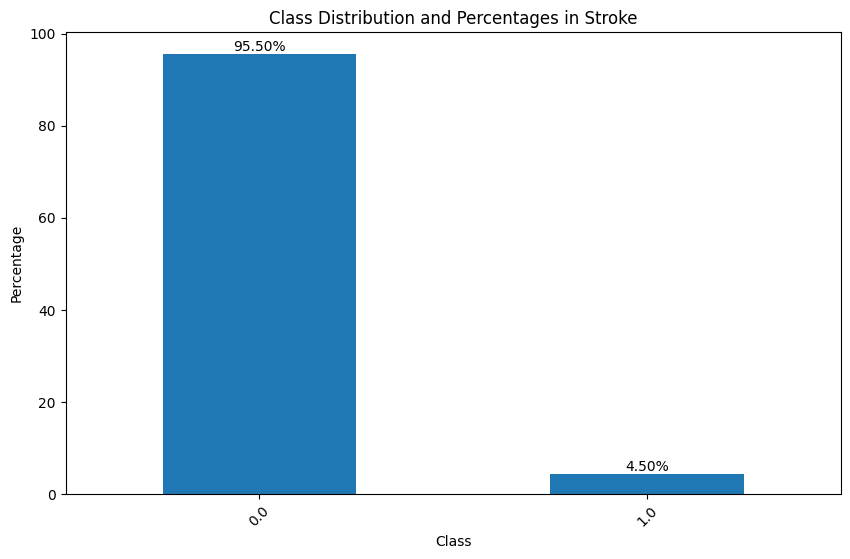

Imbalance Ratio: 21.20
Class Percentages:
Stroke
0.0    95.495148
1.0     4.504852
Name: count, dtype: float64


In [ ]:
def assess_class_imbalance_and_ratio(df, column_name):

    # Count the instances of each class
    class_counts = df[column_name].value_counts()

    # Calculate the total number of instances
    total_instances = class_counts.sum()

    # Calculate the percentage of each class
    class_percentages = (class_counts / total_instances) * 100

    # Calculate the imbalance ratio
    imbalance_ratio = class_counts.max() / class_counts.min()

    # Visualize the class distribution and percentages
    plt.figure(figsize=(10, 6))
    class_percentages.plot(kind='bar')
    plt.title(f'Class Distribution and Percentages in {column_name}')
    plt.xlabel('Class')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)

    # Annotate each bar with its percentage value
    for index, value in enumerate(class_percentages):
        plt.text(index, value, f"{value:.2f}%", va='bottom', ha='center')

    plt.show()

    print(f"Imbalance Ratio: {imbalance_ratio:.2f}")
    return class_percentages, imbalance_ratio

class_percentages, imbalance_ratio = assess_class_imbalance_and_ratio(train_df, 'Stroke')
print("Class Percentages:")
print(class_percentages)




#**Down sampling**

In [ ]:
majority_class = train_df[train_df['Stroke'] == 0]
minority_class = train_df[train_df['Stroke'] == 1]

# Downsample the majority class
majority_downsampled = majority_class.sample(n=len(minority_class), random_state=42)

# Combine the minority class with the downsampled majority class
balanced_df = pd.concat([minority_class, majority_downsampled])

# Shuffle the dataset to ensure the classes are mixed
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Now, balanced_df can be used for training


#**Baseline Model**

Accuracy: 0.734956731736768
Confusion Matrix:
[[1839  668]
 [ 649 1813]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.74      2507
         1.0       0.73      0.74      0.73      2462

    accuracy                           0.73      4969
   macro avg       0.73      0.73      0.73      4969
weighted avg       0.73      0.73      0.73      4969



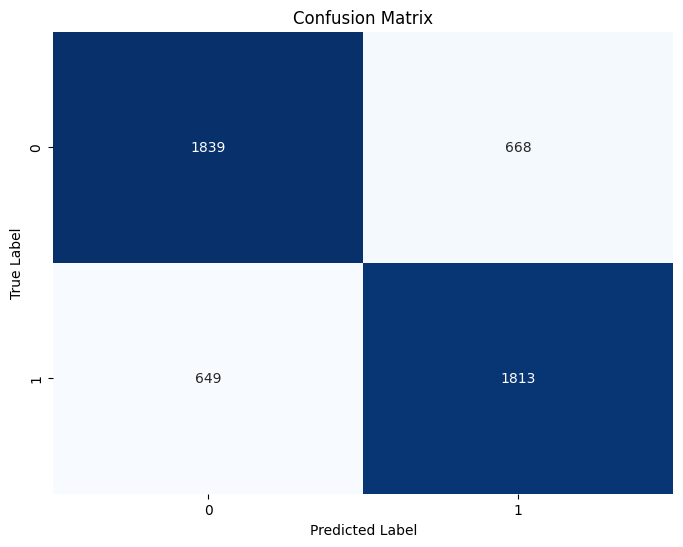

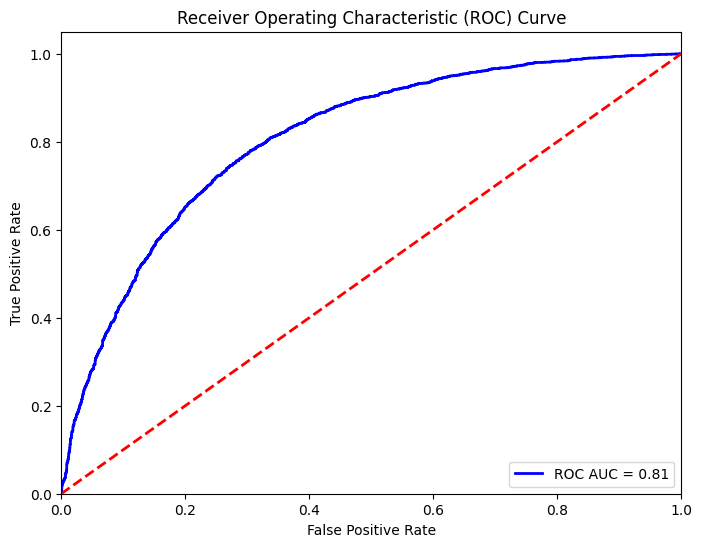

In [ ]:
# Split the data into features (X) and target (y)
X = balanced_df.drop('Stroke', axis=1)  # Features
y = balanced_df['Stroke']               # Target variable

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model with regularization (C = 1/alpha)
alpha = 0.01  # Example value for alpha
log_reg = LogisticRegression(C=1/alpha, random_state=42, max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Accuracy: 0.7254980881465084
Confusion Matrix:
[[1728  779]
 [ 585 1877]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72      2507
         1.0       0.71      0.76      0.73      2462

    accuracy                           0.73      4969
   macro avg       0.73      0.73      0.73      4969
weighted avg       0.73      0.73      0.73      4969



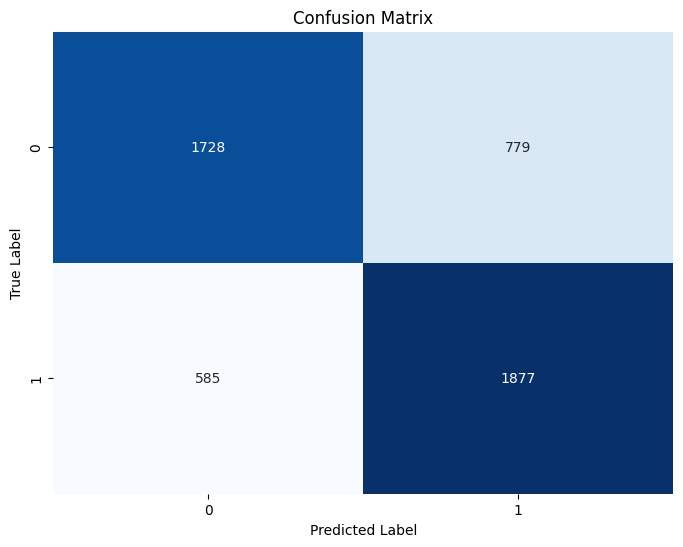

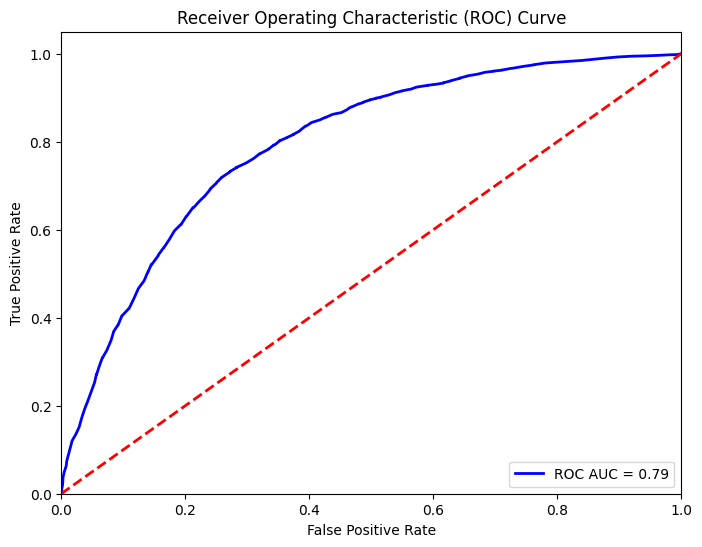


Feature Importances:
Age: 0.1355
BMI: 0.1247
Income: 0.0940
GenHlth: 0.0900
PhysHlth: 0.0737
HeartDiseaseorAttack: 0.0711
Education: 0.0612
MentHlth: 0.0517
DiffWalk: 0.0502
HighBP: 0.0460
Diabetes: 0.0286
Fruits: 0.0286
Smoker: 0.0283
HighChol: 0.0283
PhysActivity: 0.0257
Veggies: 0.0246
NoDocbcCost: 0.0138
HvyAlcoholConsump: 0.0110
AnyHealthcare: 0.0078
CholCheck: 0.0051


<ipython-input-35-ca3d829d1e27>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis', hue=None)  # Updated line


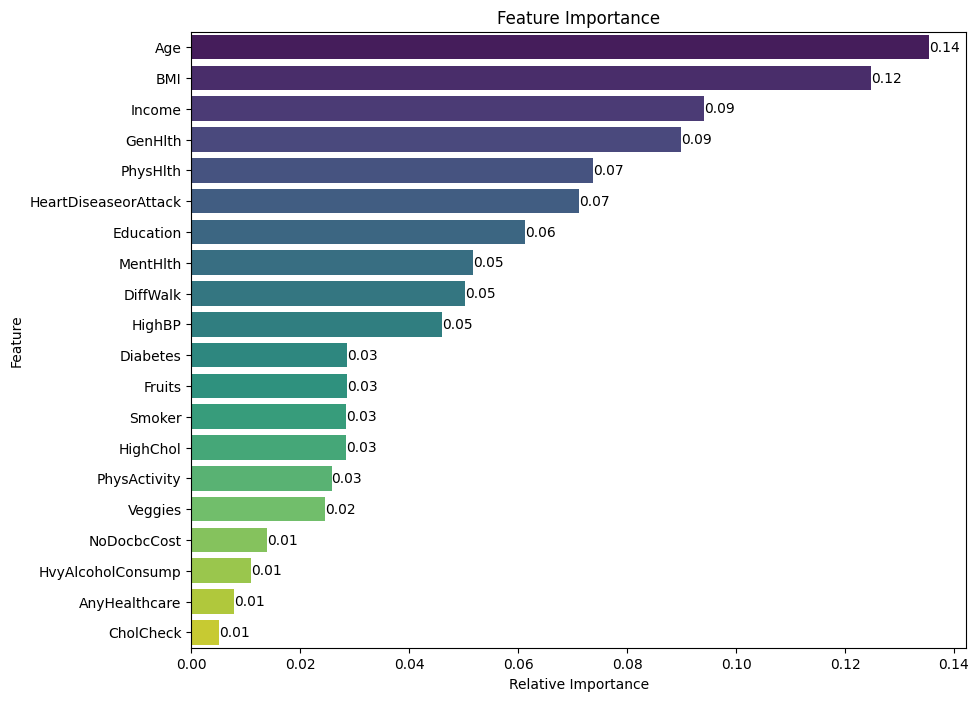

In [ ]:
# Split the data into features (X) and target (y)
X = balanced_df.drop('Stroke', axis=1)  # Features
y = balanced_df['Stroke']               # Target variable

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Feature importance visualization
importances = rf_classifier.feature_importances_
feature_names = balanced_df.drop('Stroke', axis=1).columns

# Sort features by importance
indices = importances.argsort()[::-1]

# Print feature importances
print("\nFeature Importances:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.title('Feature Importance')
sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis', hue=None)  # Updated line
plt.xlabel('Relative Importance')
plt.ylabel('Feature')

# Annotate feature importance
for i, v in enumerate(importances[indices]):
    plt.text(v, i, f"{v:.2f}", color='black', va='center')
plt.show()


Accuracy: 0.734956731736768
Confusion Matrix:
[[1839  668]
 [ 649 1813]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.74      2507
         1.0       0.73      0.74      0.73      2462

    accuracy                           0.73      4969
   macro avg       0.73      0.73      0.73      4969
weighted avg       0.73      0.73      0.73      4969



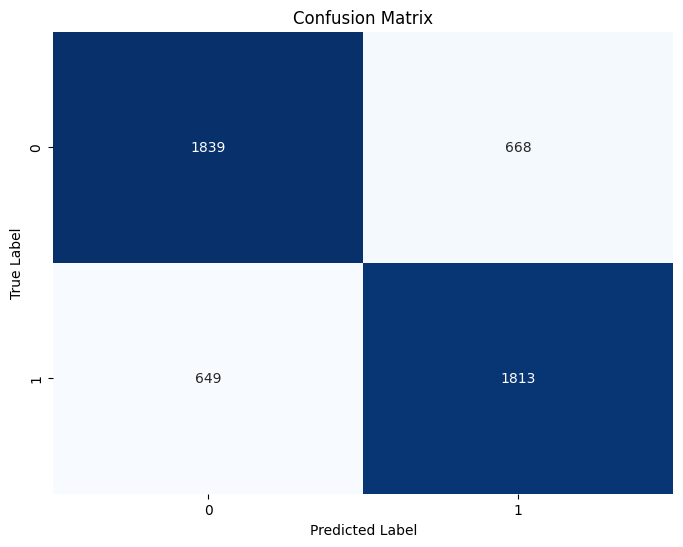

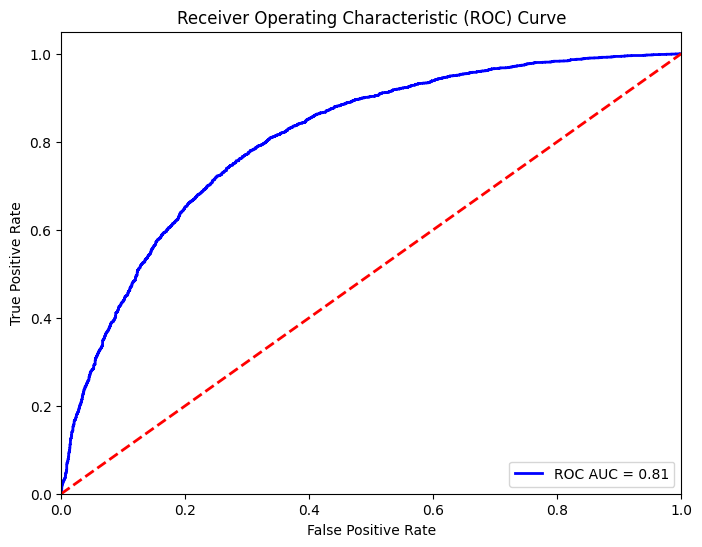

<ipython-input-36-0fe92f06daf5>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=importance_df, palette='viridis', hue=None)  # Updated line to address FutureWarning


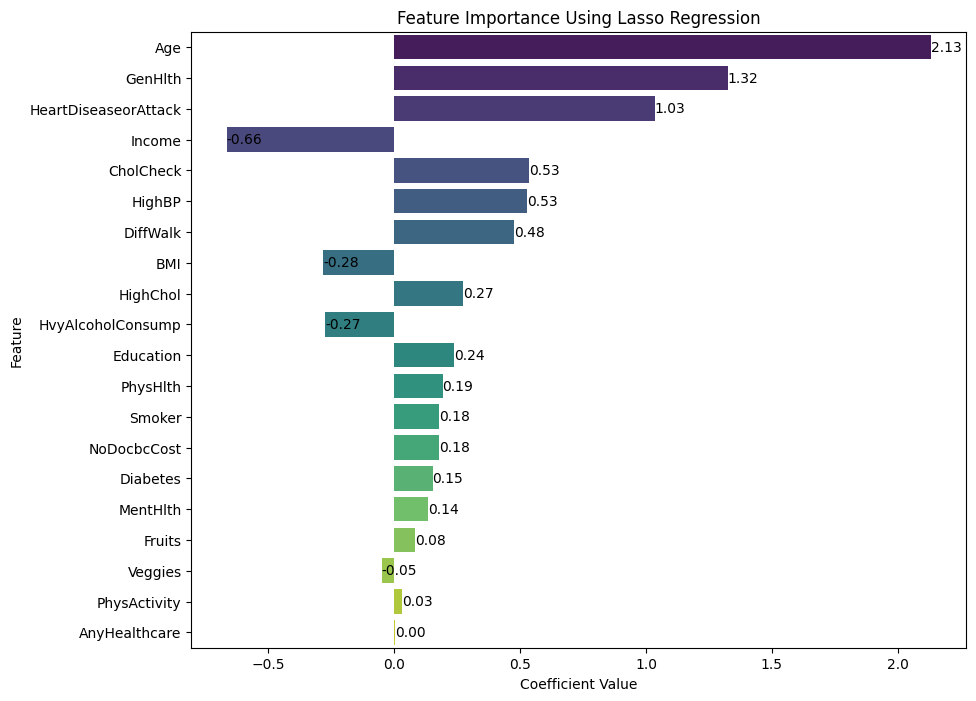

Feature Importances:
Age                       2.132343
GenHlth                   1.324749
HeartDiseaseorAttack      1.034213
Income                    -0.664669
CholCheck                 0.534860
HighBP                    0.528990
DiffWalk                  0.477252
BMI                       -0.282475
HighChol                  0.274800
HvyAlcoholConsump         -0.273408
Education                 0.239123
PhysHlth                  0.192641
Smoker                    0.179558
NoDocbcCost               0.179363
Diabetes                  0.153120
MentHlth                  0.135903
Fruits                    0.084037
Veggies                   -0.049784
PhysActivity              0.032307
AnyHealthcare             0.004301


In [ ]:
# Split the data into features (X) and target (y)
X = balanced_df.drop('Stroke', axis=1)  # Features
y = balanced_df['Stroke']               # Target variable

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model with Lasso regularization (L1)
alpha = 0.01  # Example value for alpha
lasso_log_reg = LogisticRegression(C=1/alpha, penalty='l1', solver='saga', random_state=42, max_iter=1000)

# Train the model
lasso_log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso_log_reg.predict(X_test)
y_pred_prob = lasso_log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Feature importance visualization using Lasso coefficients
coefficients = lasso_log_reg.coef_.flatten()
feature_names = balanced_df.drop('Stroke', axis=1).columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Filter non-zero coefficients
importance_df = importance_df[importance_df['Coefficient'] != 0]

# Sort features by importance (absolute value of coefficients)
importance_df = importance_df.sort_values(by='Coefficient', key=np.abs, ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=importance_df, palette='viridis', hue=None)  # Updated line to address FutureWarning
plt.title('Feature Importance Using Lasso Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

# Annotate feature importance
for index, value in enumerate(importance_df['Coefficient']):
    plt.text(value, index, f"{value:.2f}", color='black', va='center')

plt.show()

# Print feature importance
print("Feature Importances:")
for feature, coef in zip(importance_df['Feature'], importance_df['Coefficient']):
    print(f"{feature: <25} {coef:.6f}")



# Gradient Boosting Machines (GBM)

Gradient Boosting Accuracy: 0.734956731736768
Gradient Boosting Confusion Matrix:
[[1737  770]
 [ 547 1915]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.73      2507
         1.0       0.71      0.78      0.74      2462

    accuracy                           0.73      4969
   macro avg       0.74      0.74      0.73      4969
weighted avg       0.74      0.73      0.73      4969



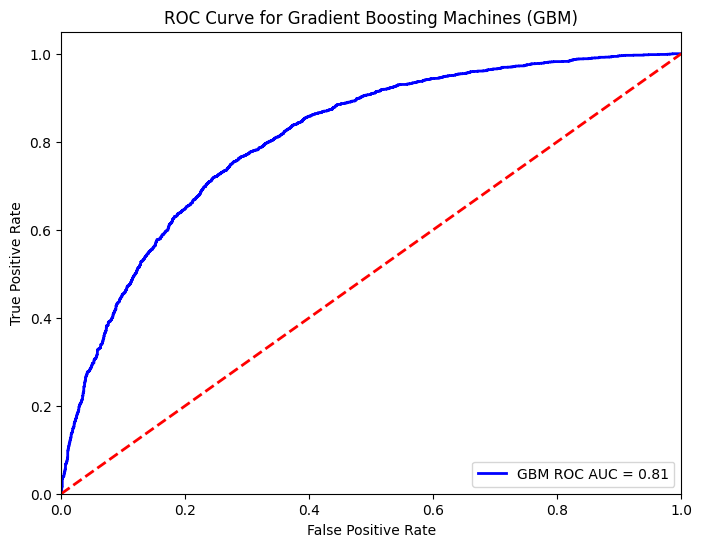

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=42)

# Train the model
gbm.fit(X_train, y_train)

# Predict on the test set
y_pred_gbm = gbm.predict(X_test)
y_pred_prob_gbm = gbm.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)

print(f'Gradient Boosting Accuracy: {accuracy_gbm}')
print('Gradient Boosting Confusion Matrix:')
print(conf_matrix_gbm)
print('Gradient Boosting Classification Report:')
print(class_report_gbm)

# ROC AUC Curve for GBM
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_pred_prob_gbm)
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gbm, tpr_gbm, color='blue', lw=2, label=f'GBM ROC AUC = {roc_auc_gbm:.2f}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Machines (GBM)')
plt.legend(loc='lower right')
plt.show()


# Support Vector Machines (SVM)

SVM Accuracy: 0.7367679613604347
SVM Confusion Matrix:
[[1759  748]
 [ 560 1902]]
SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73      2507
         1.0       0.72      0.77      0.74      2462

    accuracy                           0.74      4969
   macro avg       0.74      0.74      0.74      4969
weighted avg       0.74      0.74      0.74      4969



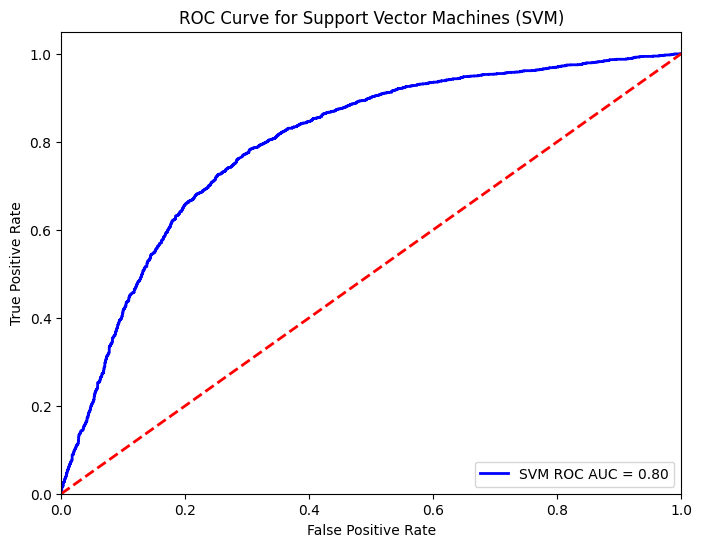

In [ ]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier
svm = SVC(probability=True, random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)
y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm}')
print('SVM Confusion Matrix:')
print(conf_matrix_svm)
print('SVM Classification Report:')
print(class_report_svm)

# ROC AUC Curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM ROC AUC = {roc_auc_svm:.2f}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Support Vector Machines (SVM)')
plt.legend(loc='lower right')
plt.show()


# Neural Networks

Neural Network Accuracy: 0.7224793721070638
Neural Network Confusion Matrix:
[[1683  824]
 [ 555 1907]]
Neural Network Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71      2507
         1.0       0.70      0.77      0.73      2462

    accuracy                           0.72      4969
   macro avg       0.73      0.72      0.72      4969
weighted avg       0.73      0.72      0.72      4969



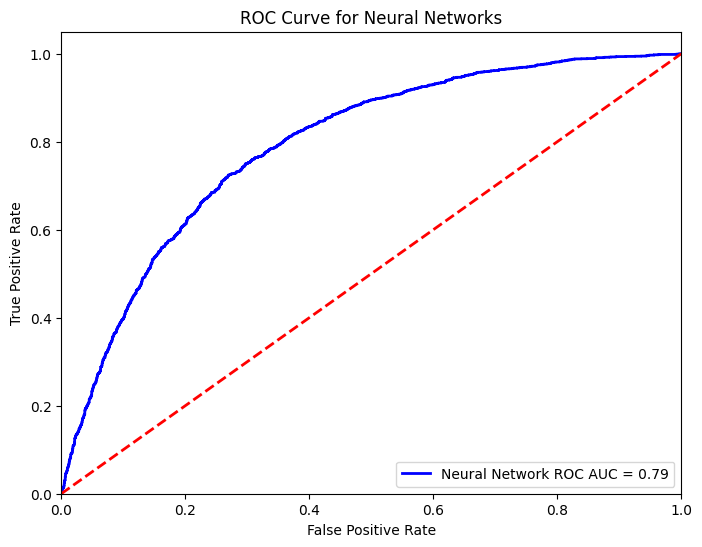

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize the Neural Network Classifier
mlp = MLPClassifier(random_state=42, max_iter=1000)

# Train the model
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp.predict(X_test)
y_pred_prob_mlp = mlp.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
class_report_mlp = classification_report(y_test, y_pred_mlp)

print(f'Neural Network Accuracy: {accuracy_mlp}')
print('Neural Network Confusion Matrix:')
print(conf_matrix_mlp)
print('Neural Network Classification Report:')
print(class_report_mlp)

# ROC AUC Curve for Neural Networks
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='blue', lw=2, label=f'Neural Network ROC AUC = {roc_auc_mlp:.2f}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Networks')
plt.legend(loc='lower right')
plt.show()

# K-Nearest Neighbors (KNN)

KNN Accuracy: 0.6951096800160999
KNN Confusion Matrix:
[[1730  777]
 [ 738 1724]]
KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.69      0.70      2507
         1.0       0.69      0.70      0.69      2462

    accuracy                           0.70      4969
   macro avg       0.70      0.70      0.70      4969
weighted avg       0.70      0.70      0.70      4969



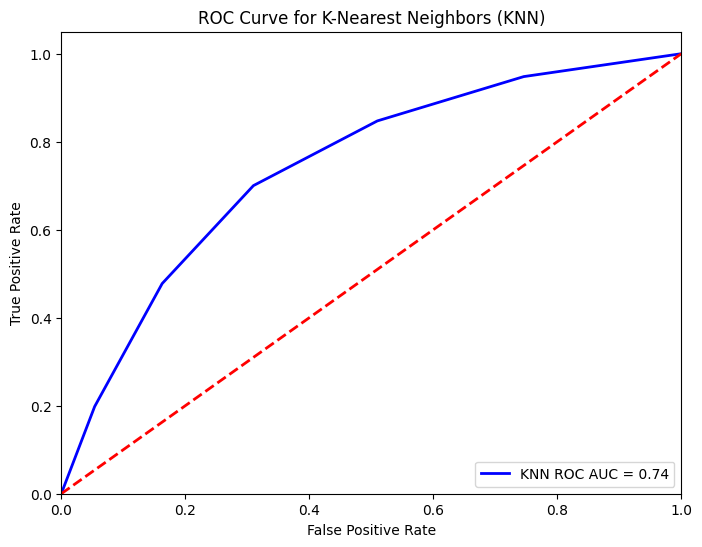

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print(f'KNN Accuracy: {accuracy_knn}')
print('KNN Confusion Matrix:')
print(conf_matrix_knn)
print('KNN Classification Report:')
print(class_report_knn)

# ROC AUC Curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN ROC AUC = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Nearest Neighbors (KNN)')
plt.legend(loc='lower right')
plt.show()


# Naive Bayes

Naive Bayes Accuracy: 0.7126182330448783
Naive Bayes Confusion Matrix:
[[1767  740]
 [ 688 1774]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.70      0.71      2507
         1.0       0.71      0.72      0.71      2462

    accuracy                           0.71      4969
   macro avg       0.71      0.71      0.71      4969
weighted avg       0.71      0.71      0.71      4969



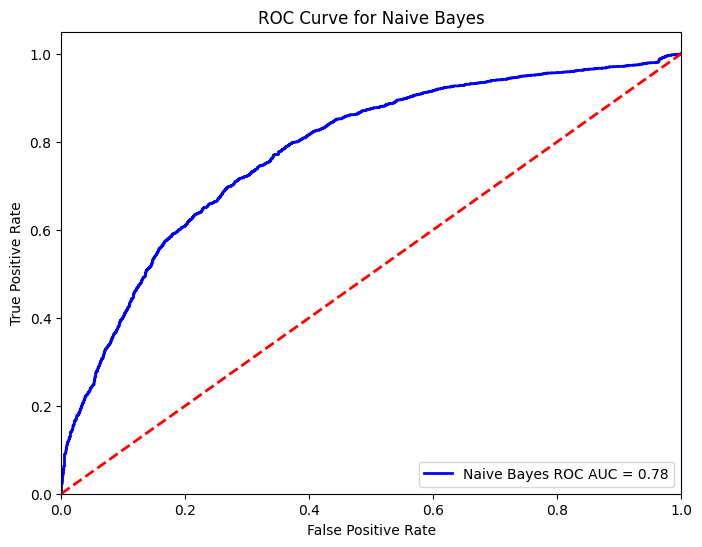

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes Classifier
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb.predict(X_test)
y_pred_prob_nb = nb.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

print(f'Naive Bayes Accuracy: {accuracy_nb}')
print('Naive Bayes Confusion Matrix:')
print(conf_matrix_nb)
print('Naive Bayes Classification Report:')
print(class_report_nb)

# ROC AUC Curve for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'Naive Bayes ROC AUC = {roc_auc_nb:.2f}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.734956731736768
Confusion Matrix:
[[1839  668]
 [ 649 1813]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.74      2507
         1.0       0.73      0.74      0.73      2462

    accuracy                           0.73      4969
   macro avg       0.73      0.73      0.73      4969
weighted avg       0.73      0.73      0.73      4969



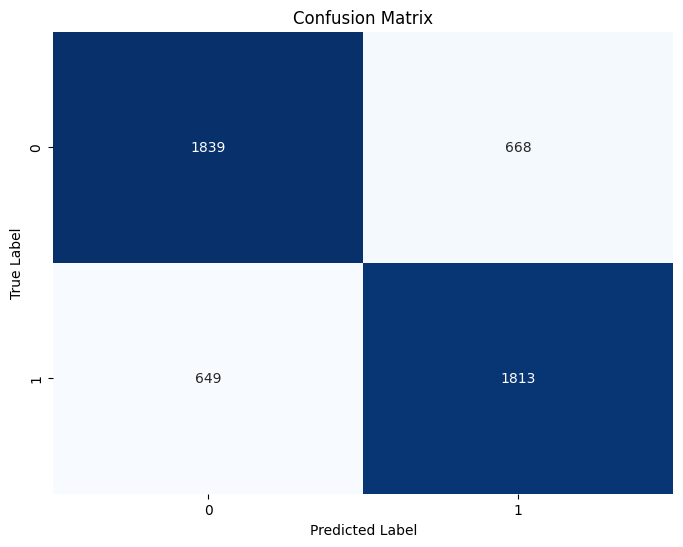

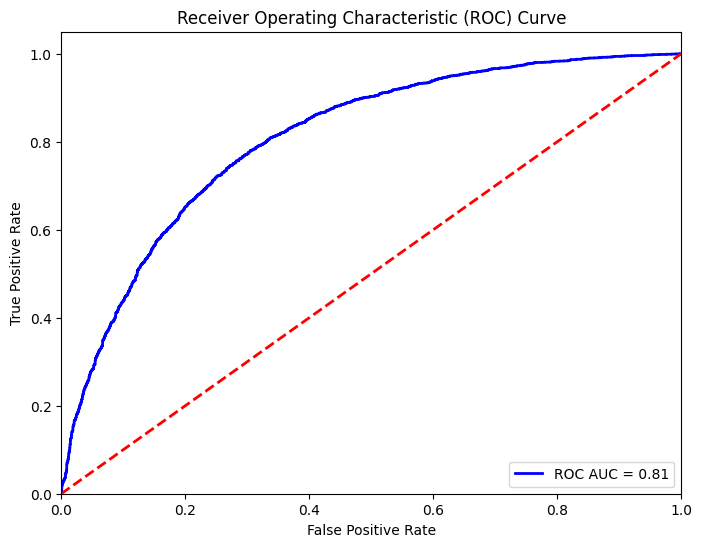

Removing AnyHealthcare with p-value 0.8623
Removing PhysActivity with p-value 0.1463
Removing Veggies with p-value 0.1266
Selected Features: ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Diabetes', 'Fruits', 'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']
Accuracy with Selected Features: 0.7335479975850272
Confusion Matrix with Selected Features:
[[1839  668]
 [ 656 1806]]
Classification Report with Selected Features:
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.74      2507
         1.0       0.73      0.73      0.73      2462

    accuracy                           0.73      4969
   macro avg       0.73      0.73      0.73      4969
weighted avg       0.73      0.73      0.73      4969



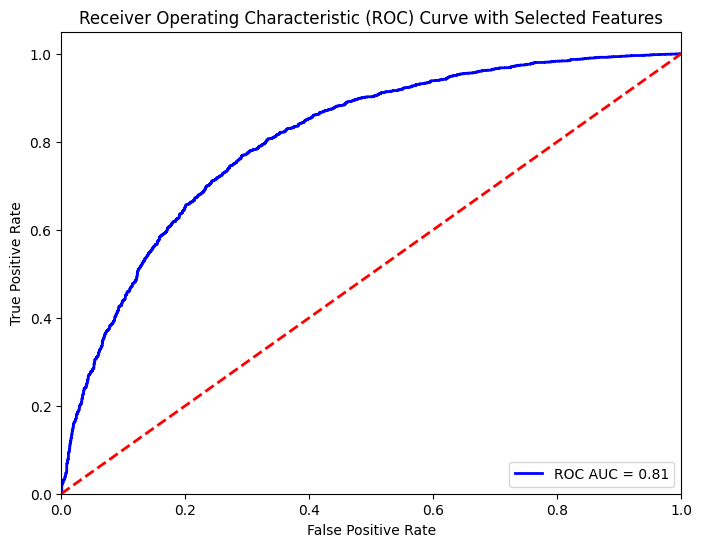

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Split the data into features (X) and target (y)
X = balanced_df.drop('Stroke', axis=1)  # Features
y = balanced_df['Stroke']               # Target variable

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model with regularization (C = 1/alpha)
alpha = 0.01  # Example value for alpha
log_reg = LogisticRegression(C=1/alpha, random_state=42, max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the ROC AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Backward Selection for Feature Selection

def backward_selection(X, y, model):
    """ Perform backward feature selection """
    initial_features = X.columns
    selected_features = initial_features.tolist()
    while len(selected_features) > 0:
        features_with_intercept = sm.add_constant(X[selected_features])
        model_sm = sm.Logit(y, features_with_intercept).fit(disp=False)
        p_values = model_sm.pvalues[1:]  # Skip the intercept
        max_p_value = p_values.max()
        if max_p_value >= 0.05:
            feature_to_remove = p_values.idxmax()
            selected_features.remove(feature_to_remove)
            print(f'Removing {feature_to_remove} with p-value {max_p_value:.4f}')
        else:
            break
    return selected_features

# Perform backward selection
selected_features = backward_selection(X, y, log_reg)
print(f'Selected Features: {selected_features}')

# Train the model with selected features
X_train_selected = X_train[:, [X.columns.get_loc(feature) for feature in selected_features]]
X_test_selected = X_test[:, [X.columns.get_loc(feature) for feature in selected_features]]

log_reg.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_selected = log_reg.predict(X_test_selected)
y_pred_prob_selected = log_reg.predict_proba(X_test_selected)[:, 1]

# Evaluate the model with selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)
class_report_selected = classification_report(y_test, y_pred_selected)

print(f'Accuracy with Selected Features: {accuracy_selected}')
print('Confusion Matrix with Selected Features:')
print(conf_matrix_selected)
print('Classification Report with Selected Features:')
print(class_report_selected)

# Plot the ROC AUC curve with selected features
fpr_selected, tpr_selected, _ = roc_curve(y_test, y_pred_prob_selected)
roc_auc_selected = auc(fpr_selected, tpr_selected)

plt.figure(figsize=(8, 6))
plt.plot(fpr_selected, tpr_selected, color='blue', lw=2, label=f'ROC AUC = {roc_auc_selected:.2f}')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Selected Features')
plt.legend(loc='lower right')
plt.show()


Selected Features:
Index(['HeartDiseaseorAttack', 'HighBP', 'BMI', 'GenHlth', 'MentHlth',
       'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income'],
      dtype='object')
Random Forest:
  Accuracy: 0.7100
  ROC AUC: 0.7719



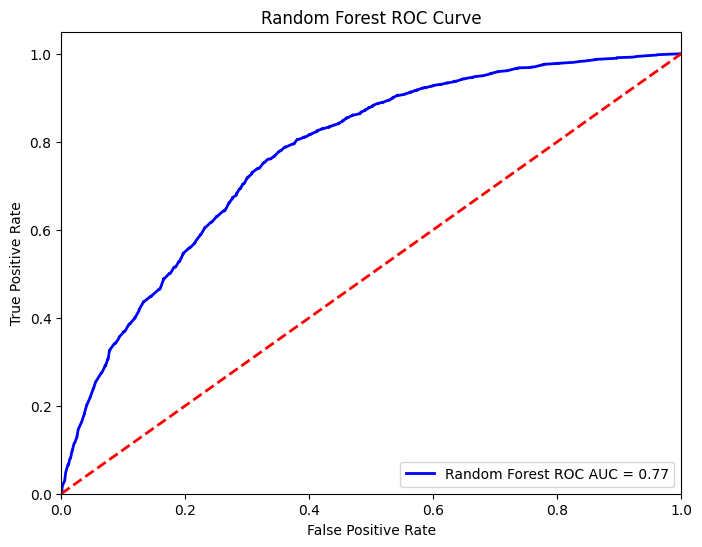

Ridge Classifier:
  Accuracy: 0.7356
  ROC AUC: N/A

Decision Tree:
  Accuracy: 0.6456
  ROC AUC: 0.6440



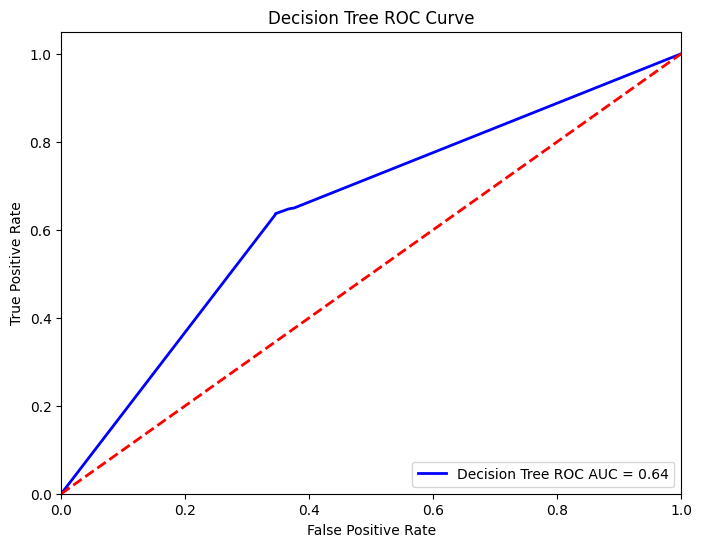

Linear Discriminant Analysis:
  Accuracy: 0.7354
  ROC AUC: 0.8069



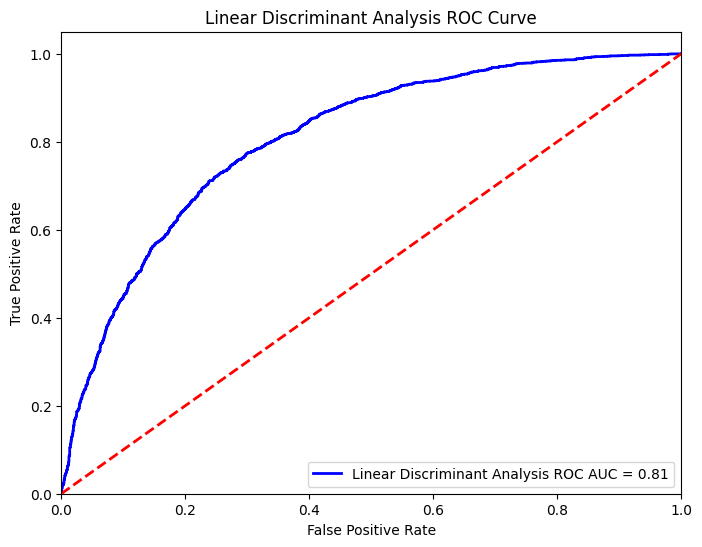

AdaBoost:
  Accuracy: 0.7323
  ROC AUC: 0.8058



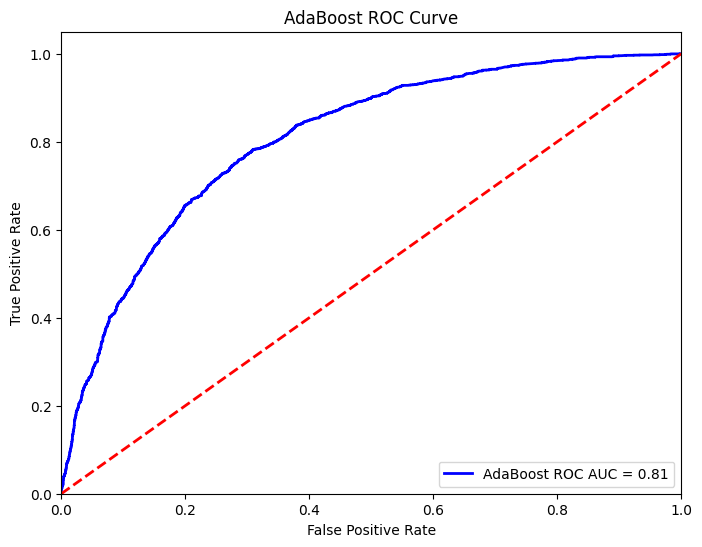

Gradient Boosting:
  Accuracy: 0.7356
  ROC AUC: 0.8088



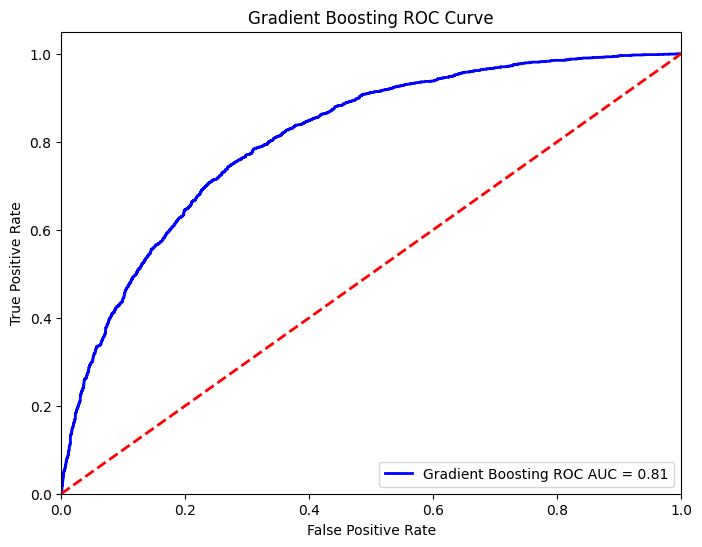

SVM:
  Accuracy: 0.7311
  ROC AUC: 0.7921



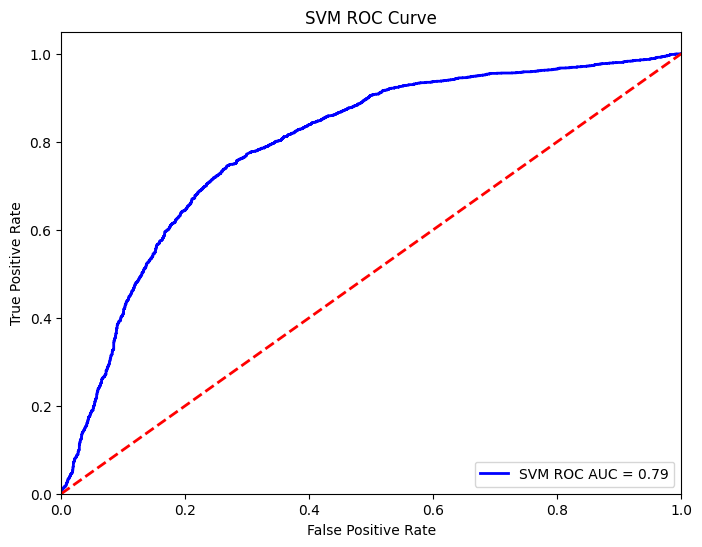

Neural Network:
  Accuracy: 0.7392
  ROC AUC: 0.8110



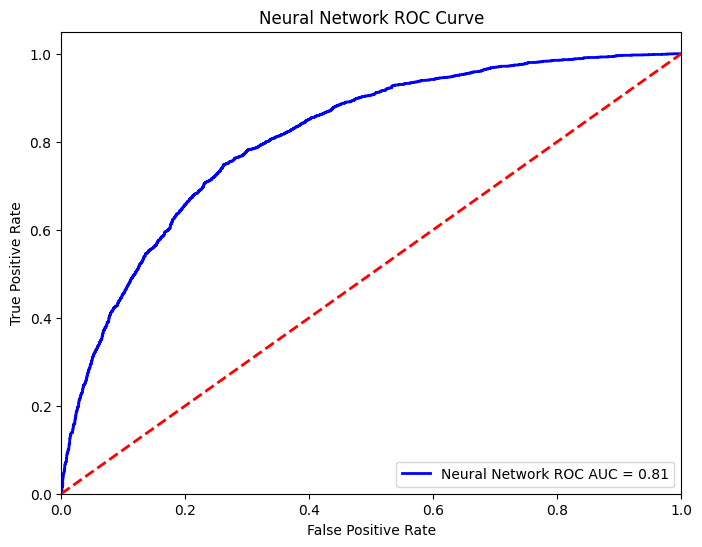

Quadratic Discriminant Analysis:
  Accuracy: 0.7221
  ROC AUC: 0.7994



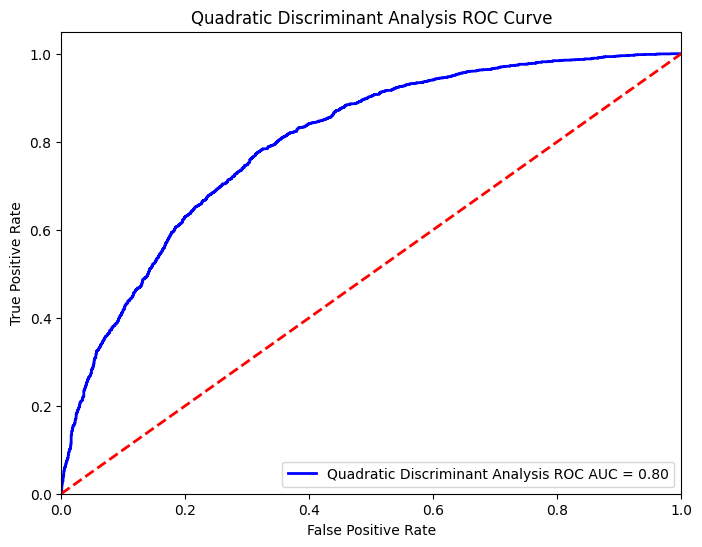

Naive Bayes:
  Accuracy: 0.7150
  ROC AUC: 0.7985



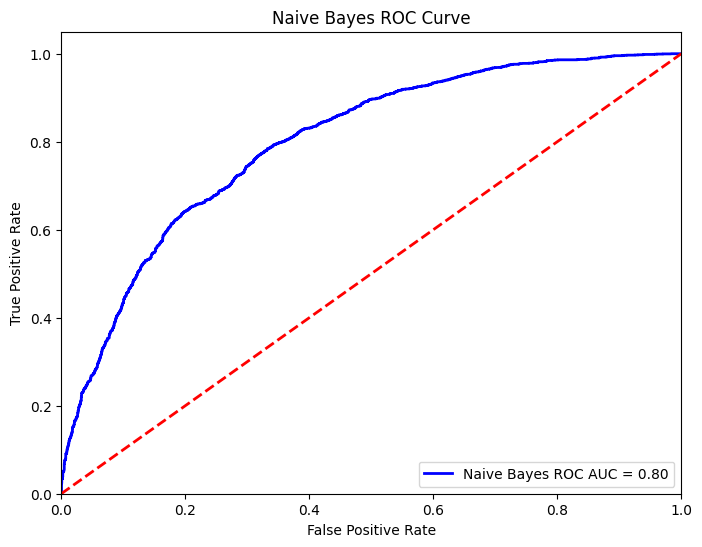

KNN:
  Accuracy: 0.7076
  ROC AUC: 0.7620



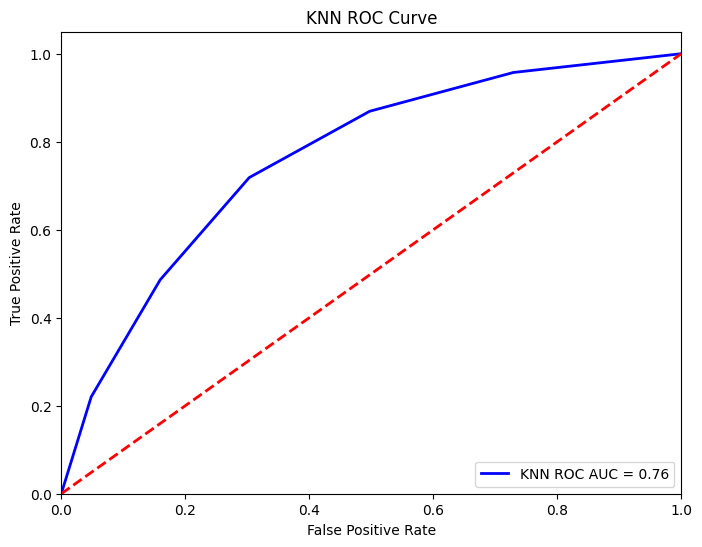

Logistic Regression:
  Accuracy: 0.7340
  ROC AUC: 0.8070



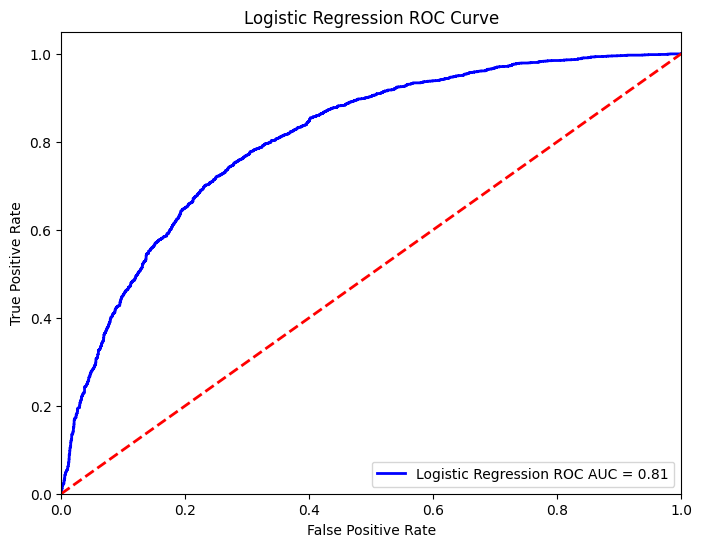

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

# Define a function to perform Random Forest feature selection and test multiple models
def test_models_with_rf_feature_selection(X, y, random_state=42):
    # Scale the data
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)

    # Perform feature selection using Random Forest
    rf = RandomForestClassifier(random_state=random_state)
    rf.fit(X_train, y_train)
    selector = SelectFromModel(rf, threshold='median', prefit=True)
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)

    # Get selected feature names
    selected_features = X.columns[selector.get_support()]

    print("Selected Features:")
    print(selected_features)

    # Define models to test
    models = {
        'Random Forest': RandomForestClassifier(random_state=random_state),
        'Ridge Classifier': RidgeClassifier(),
        'Decision Tree': DecisionTreeClassifier(random_state=random_state),
        'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
        'AdaBoost': AdaBoostClassifier(random_state=random_state),
        'Gradient Boosting': GradientBoostingClassifier(random_state=random_state),
        'SVM': SVC(random_state=random_state, probability=True),
        'Neural Network': MLPClassifier(random_state=random_state, max_iter=1000),
        'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier(),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=random_state)
    }

    # Test each model
    for name, model in models.items():
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)
        y_pred_prob = model.predict_proba(X_test_selected)[:, 1] if hasattr(model, "predict_proba") else None

        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else 'N/A'

        print(f'{name}:')
        print(f'  Accuracy: {accuracy:.4f}')
        if isinstance(roc_auc, float):  # Check if roc_auc is a numeric value
            print(f'  ROC AUC: {roc_auc:.4f}\n')
            # Plot the ROC curve
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='blue', lw=2, label=f'{name} ROC AUC = {roc_auc:.2f}')
            plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'{name} ROC Curve')
            plt.legend(loc='lower right')
            plt.show()
        else:
            print(f'  ROC AUC: {roc_auc}\n')

# Example usage with your data
X = balanced_df.drop('Stroke', axis=1)  # Features
y = balanced_df['Stroke']               # Target variable

# Call the function
test_models_with_rf_feature_selection(X, y)


In [ ]:
import pandas as pd

# Define a function to perform Random Forest feature selection, test multiple models, and save the metrics
def test_models_and_save_metrics(X, y, random_state=42, output_file='model_evaluation_metrics.csv'):
    # Scale the data
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)

    # Perform feature selection using Random Forest
    rf = RandomForestClassifier(random_state=random_state)
    rf.fit(X_train, y_train)
    selector = SelectFromModel(rf, threshold='median', prefit=True)
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)

    # Get selected feature names
    selected_features = X.columns[selector.get_support()]
    print("Selected Features:")
    print(selected_features)

    # Define models to test
    models = {
        'Random Forest': RandomForestClassifier(random_state=random_state),
        'Ridge Classifier': RidgeClassifier(),
        'Decision Tree': DecisionTreeClassifier(random_state=random_state),
        'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
        'AdaBoost': AdaBoostClassifier(random_state=random_state),
        'Gradient Boosting': GradientBoostingClassifier(random_state=random_state),
        'SVM': SVC(random_state=random_state, probability=True),
        'Neural Network': MLPClassifier(random_state=random_state, max_iter=1000),
        'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier(),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=random_state)
    }

    # Initialize an empty list to store metrics
    metrics_list = []

    # Test each model and save metrics
    for name, model in models.items():
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)
        y_pred_prob = model.predict_proba(X_test_selected)[:, 1] if hasattr(model, "predict_proba") else None

        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else 'N/A'
        report = classification_report(y_test, y_pred, output_dict=True)

        metrics_list.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision_No_Stroke': report['0.0']['precision'],
            'Recall_No_Stroke': report['0.0']['recall'],
            'F1_No_Stroke': report['0.0']['f1-score'],
            'Precision_Stroke': report['1.0']['precision'],
            'Recall_Stroke': report['1.0']['recall'],
            'F1_Stroke': report['1.0']['f1-score'],
            'ROC_AUC': roc_auc if isinstance(roc_auc, float) else 'N/A'
        })

        print(f'{name} metrics saved.')

    # Convert the list of metrics to a DataFrame
    metrics_df = pd.DataFrame(metrics_list)

    # Save the DataFrame to a CSV file
    metrics_df.to_csv(output_file, index=False)
    print(f'Metrics saved to {output_file}')

# Example usage with your data
X = balanced_df.drop('Stroke', axis=1)  # Features
y = balanced_df['Stroke']               # Target variable

# Call the function
test_models_and_save_metrics(X, y)


Selected Features:
Index(['HeartDiseaseorAttack', 'HighBP', 'BMI', 'GenHlth', 'MentHlth',
       'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income'],
      dtype='object')
Random Forest metrics saved.
Ridge Classifier metrics saved.
Decision Tree metrics saved.
Linear Discriminant Analysis metrics saved.
AdaBoost metrics saved.
Gradient Boosting metrics saved.
SVM metrics saved.
Neural Network metrics saved.
Quadratic Discriminant Analysis metrics saved.
Naive Bayes metrics saved.
KNN metrics saved.
Logistic Regression metrics saved.
Metrics saved to model_evaluation_metrics.csv


In [ ]:
model_metrics = pd.read_csv('model_evaluation_metrics.csv')
print(model_metrics)


                              Model  Accuracy  Precision_No_Stroke  \
0                     Random Forest  0.710002             0.727389   
1                  Ridge Classifier  0.735560             0.736425   
2                     Decision Tree  0.645603             0.647082   
3      Linear Discriminant Analysis  0.735359             0.736320   
4                          AdaBoost  0.732341             0.735118   
5                 Gradient Boosting  0.735560             0.762891   
6                               SVM  0.731133             0.761734   
7                    Neural Network  0.739183             0.763146   
8   Quadratic Discriminant Analysis  0.722077             0.721654   
9                       Naive Bayes  0.715033             0.704844   
10                              KNN  0.707587             0.715984   
11              Logistic Regression  0.733950             0.736905   

    Recall_No_Stroke  F1_No_Stroke  Precision_Stroke  Recall_Stroke  \
0           0.6800

In [ ]:
model_metrics.columns

Index(['Model', 'Accuracy', 'Precision_No_Stroke', 'Recall_No_Stroke',
       'F1_No_Stroke', 'Precision_Stroke', 'Recall_Stroke', 'F1_Stroke',
       'ROC_AUC'],
      dtype='object')

In [ ]:
model_metrics = pd.read_csv('model_evaluation_metrics.csv')

# Visualise Metrics

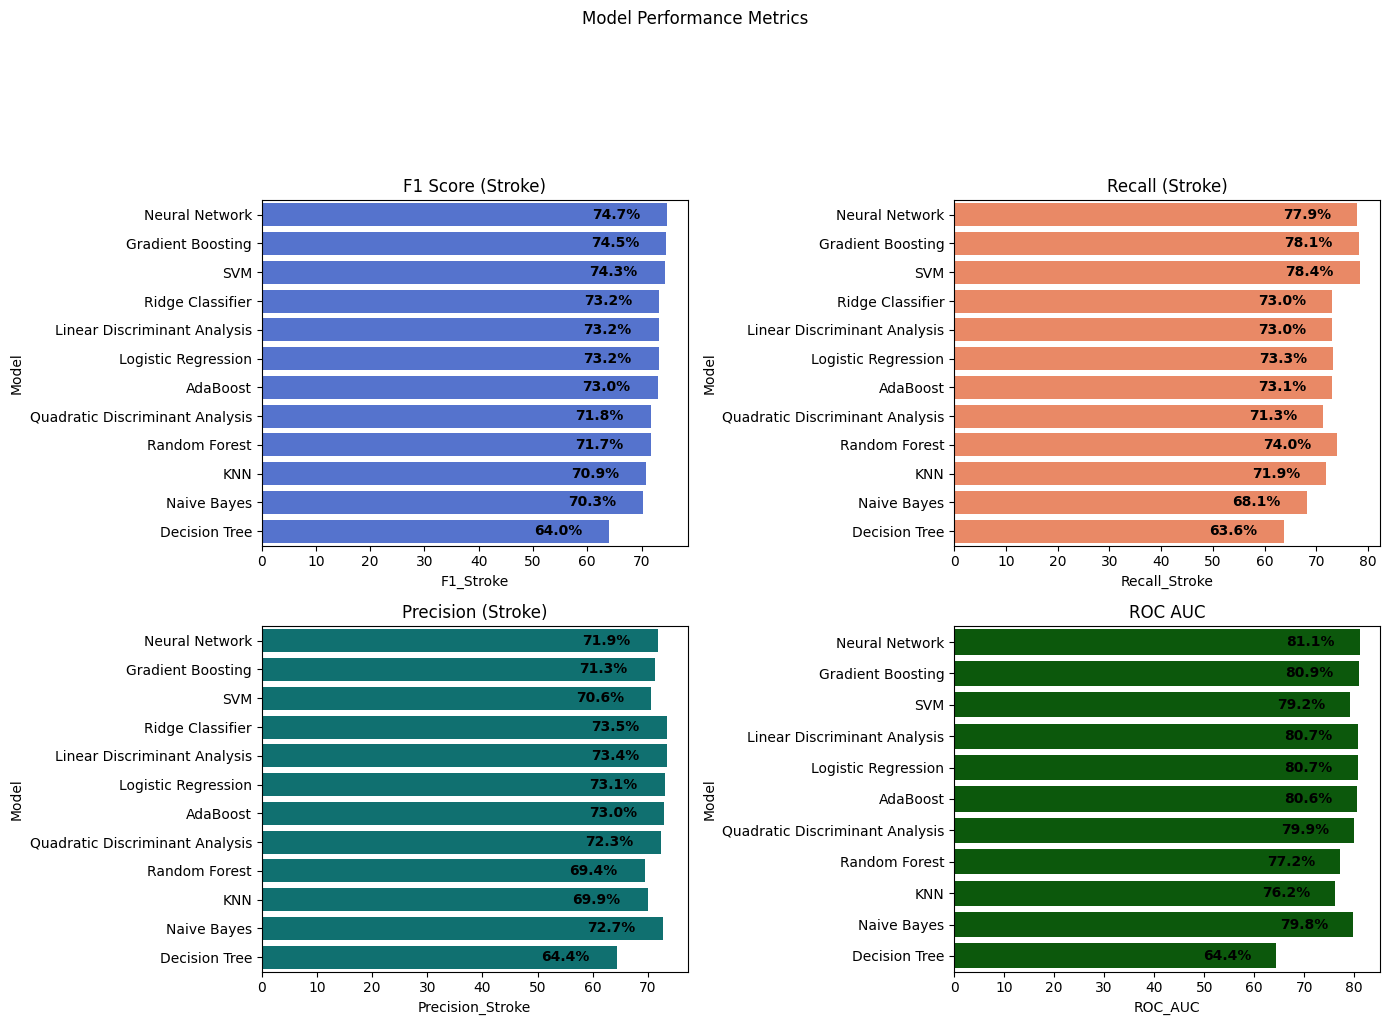

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from CSV file
model_metrics = pd.read_csv('model_evaluation_metrics.csv')

# Convert metrics to percentage format for better readability
metrics = ['F1_Stroke', 'Recall_Stroke', 'Precision_Stroke', 'ROC_AUC']
model_metrics[metrics] = model_metrics[metrics] * 100

# Sort the metrics for better readability
model_metrics_sorted = model_metrics.sort_values(by='F1_Stroke', ascending=False)

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Performance Metrics', y=1.02)

# Function to annotate bars with adjustment
def annotate_bars(ax, data, metric):
    for p in ax.patches:
        width = p.get_width()
        # Adjust text position based on bar width and height
        ax.text(width - 5, p.get_y() + p.get_height() / 2,
                f'{width:.1f}%',
                ha='right', va='center', fontsize=10, color='black', fontweight='bold')

# Plot F1 Score
sns.barplot(ax=axes[0, 0], x='F1_Stroke', y='Model', data=model_metrics_sorted, color='royalblue')
axes[0, 0].set_title('F1 Score (Stroke)')
annotate_bars(axes[0, 0], model_metrics_sorted, 'F1_Stroke')

# Plot Recall
sns.barplot(ax=axes[0, 1], x='Recall_Stroke', y='Model', data=model_metrics_sorted, color='coral')
axes[0, 1].set_title('Recall (Stroke)')
annotate_bars(axes[0, 1], model_metrics_sorted, 'Recall_Stroke')

# Plot Precision
sns.barplot(ax=axes[1, 0], x='Precision_Stroke', y='Model', data=model_metrics_sorted, color='teal')
axes[1, 0].set_title('Precision (Stroke)')
annotate_bars(axes[1, 0], model_metrics_sorted, 'Precision_Stroke')

# Plot ROC AUC
sns.barplot(ax=axes[1, 1], x='ROC_AUC', y='Model', data=model_metrics_sorted.dropna(subset=['ROC_AUC']), color='darkgreen')
axes[1, 1].set_title('ROC AUC')
annotate_bars(axes[1, 1], model_metrics_sorted.dropna(subset=['ROC_AUC']), 'ROC_AUC')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()





# Optimize Keras and Tensor Flow

In [ ]:
!pip install shap

<ipython-input-94-afffac34155e>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage', y='Metric', data=metrics_df, ax=axes[0], palette='viridis')


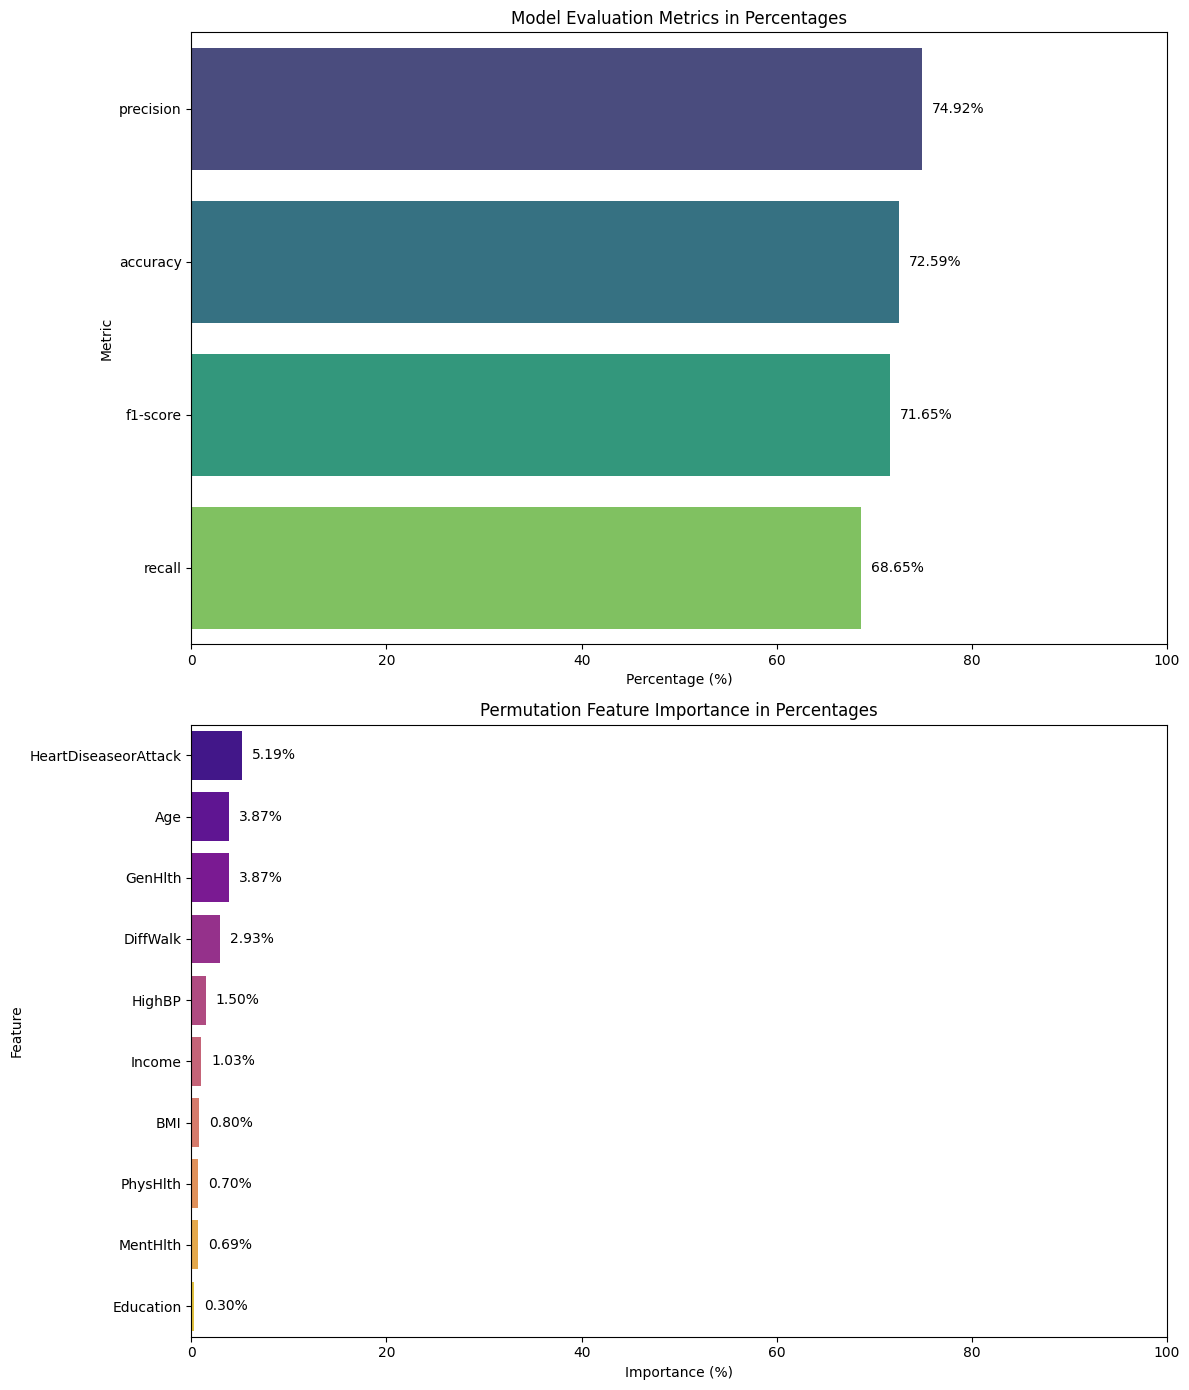

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import permutation_importance
import warnings
# Assuming balanced_df is your DataFrame with the data
X = balanced_df.drop('Stroke', axis=1)  # Features
y = balanced_df['Stroke']               # Target variable

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Perform feature selection using Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
selector = SelectFromModel(rf, threshold='median', prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Define and train the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.001, learning_rate='adaptive', max_iter=1000, random_state=42)
mlp.fit(X_train_selected, y_train)

# Evaluate the model on the test set
y_pred = mlp.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Identify the correct positive class label
positive_label = str(y.unique()[1])  # Assuming the positive class is the second unique value in 'y'

# Convert metrics to percentages
metrics = {
    'accuracy': accuracy * 100,
    'precision': report[positive_label]['precision'] * 100,  # Use the correct positive label
    'recall': report[positive_label]['recall'] * 100,      # Use the correct positive label
    'f1-score': report[positive_label]['f1-score'] * 100   # Use the correct positive label
}

# Create DataFrame for metrics
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Percentage'])
metrics_df = metrics_df.sort_values(by='Percentage', ascending=False)

# Compute permutation importance
results = permutation_importance(mlp, X_test_selected, y_test, scoring='accuracy', n_repeats=10, random_state=42)
importances = results.importances_mean

# Convert permutation importances to percentages
importances_percentage = importances * 100
features = X.columns[selector.get_support()]  # Feature names after selection

# Create DataFrame for permutation importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances_percentage
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot metrics and feature importance
fig, axes = plt.subplots(2, 1, figsize=(12, 14))
# Plot metrics
sns.barplot(x='Percentage', y='Metric', data=metrics_df, ax=axes[0], palette='viridis')
for index, value in enumerate(metrics_df['Percentage']):
    axes[0].text(value + 1, index, f'{value:.2f}%', va='center', fontsize=10)
axes[0].set_title('Model Evaluation Metrics in Percentages')
axes[0].set_xlabel('Percentage (%)')
axes[0].set_ylabel('Metric')
axes[0].set_xlim(0, 100)  # Assuming percentages range from 0 to 100

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=importance_df, ax=axes[1], palette='plasma', hue='Feature')
for index, value in enumerate(importance_df['Importance']):
    axes[1].text(value + 1, index, f'{value:.2f}%', va='center', fontsize=10)
axes[1].set_title('Permutation Feature Importance in Percentages')
axes[1].set_xlabel('Importance (%)')
axes[1].set_ylabel('Feature')
axes[1].set_xlim(0, 100)  # Assuming percentages range from 0 to 100

plt.tight_layout()
plt.show()



In [ ]:
# Define file paths
import joblib
model_file_path = '/content/drive/My Drive/neural_network_model_selected_features.joblib'


# Save the trained MLPClassifier model
joblib.dump(mlp, model_file_path)
print(f'Neural Network model saved to {model_file_path}')


Neural Network model saved to /content/drive/My Drive/neural_network_model_selected_features.joblib


In [ ]:
# Specify the file path to save the CSV
file_path = '/content/drive/My Drive/stroke_validation_data.csv'

# Save the filtered DataFrame to CSV
validation_df.to_csv(file_path, index=False)